# Project 6 - Visualizing Monetary Policy

In [1]:
import pandas as pd
import pandas_datareader.data as web
import datetime

# Gathers data from a folder
def gather_data(data_codes, # dict
                start, # start data (datetime)
                end = datetime.datetime.today(), # end date (datetime)
                freq = "M"): # str "D","W","M","Q","A". Can also add "2D", etc
    df_init = False
    for name, code in data_codes.items():
        if df_init == False:
            # .resample(freq) adjusts frequency. Choose .first(), .last(),
            # .mean(), median(), etc
            df = web.DataReader(
                code, "fred", start, end).resample(freq).mean()
            # Renames columns
            df.rename(columns = {code:name}, inplace = True)
            df_init = True
        else:
            df[name] = web.DataReader(
                code, "fred", start, end).resample(freq).mean()   
    return df

# Changes billions to millions
def bil_to_mil(series):
    return series * 10 ** 3
        
start = datetime.datetime(1970, 1, 1)
end = datetime.datetime.today()
freq = "M"

In [2]:
from datlib.plots import *
# from datlib.FRED import *

# Downloads Monetary Base and prints the data that was gathered previously
data_codes = {"Monetary Base":"BOGMBASE",
             "Currency in Circulation": "WCURCIR"}
base = gather_data(data_codes,
                   start,
                   end,
                   freq)

In [3]:
base

,Monetary Base,Currency in Circulation
DATE,,
1970-01-31,76400.0,NaN
1970-02-28,75200.0,NaN
1970-03-31,75300.0,NaN
1970-04-30,76300.0,NaN
1970-05-31,76600.0,NaN
...,...,...
2021-04-30,6042100.0,2154.81925
2021-05-31,6041900.0,2167.94475
2021-06-30,6027100.0,2178.90020


In [4]:
data_codes  = {"Base: Total ($ Mil)": "BOGMBASE",
               "Base: Currency in Circulation ($ Mil)": "WCURCIR",
               # Assets
               "Balance Sheet: Total Assets ($ Mil)": "WALCL",
               "Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)": "WSRLL",
               "Balance Sheet: Securities Held Outright ($ Mil)": "WSHOSHO",
               ### breakdown of securities holdings ###
               "Balance Sheet: U.S. Treasuries Held Outright ($ Mil)":"WSHOTSL",
               "Balance Sheet: Federal Agency Debt Securities ($ Mil)" : "WSHOFADSL",
               "Balance Sheet: Mortgage-Backed Securities ($ Mil)": "WSHOMCB",
               # other forms of lending
               "Balance Sheet: Repos ($ Mil)": "WORAL",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)" : "SWPT",
               "Balance Sheet: Direct Lending ($ Mil)" : "WLCFLL",
               # unamortized value of securities held (due to changes in interest rates)
               "Balance Sheet: Unamortized Security Premiums ($ Mil)": "WUPSHO",
               # Liabilities
               "Balance Sheet: Total Liabilities ($ Mil)" : "WLTLECL",
               "Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)" : "WLFN",
               "Balance Sheet: Reverse Repos ($ Mil)": "WLRRAL",
               ### Major share of deposits 
               "Balance Sheet: Excess Reserves ($ Mil)": "EXCSRESNW",
               "Balance Sheet: Required Reserves ($ Mil)": "RESBALREQW",
               "Balance Sheet: Total Reserves ($ Mil)": "WRESBAL",
               "Balance Sheet: Deposits from Dep. Institutions ($ Mil)":"WLODLL",
               "Balance Sheet: U.S. Treasury General Account ($ Mil)": "WDTGAL",
               "Balance Sheet: Other Deposits ($ Mil)": "WOTHLB",
               "Balance Sheet: All Deposits ($ Mil)": "WLDLCL",
               # Interest Rates
               "Federal Funds Target (Pre-Crisis)": "DFEDTAR",
               "Federal Funds (Upper) Target":"DFEDTARU",
               "Effective Federal Funds Rate":"DFF",
               "Interest on Excess Reserves":"IOER",
               # Req Reserves and Vault Cash
               "Vault Cash ($ Mil)": "TLVAULTW",
               "Vault Cash Used as Req. ($ Mil)": "VAULT",
               }

data = gather_data(data_codes = data_codes,
                  start = start,
                  end = end,
                  freq = "M")

In [5]:
bil_to_mil_list = ["Balance Sheet: Total Reserves ($ Mil)",
                  "Balance Sheet: Other Deposits ($ Mil)",
                  "Base: Currency in Circulation ($ Mil)"]
for key in bil_to_mil_list:
    data[key] = bil_to_mil(data[key])

<AxesSubplot:xlabel='DATE'>

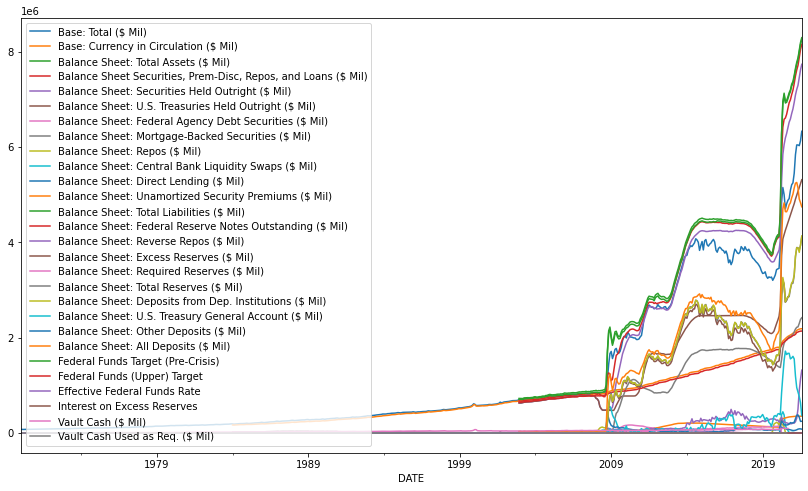

In [6]:
fig, ax = plt.subplots(figsize = (14, 8))
data.plot(ax = ax)

In [7]:
from matplotlib.backends.backend_pdf import PdfPages
def plot_lines(df,
               title = "",
              linewidth = 1,
              figsize = (40,20),
              secondary_y = None,
              legend = True,
              pp = None,
              save_fig = False):
    fig, ax = plt.subplots(figsize = figsize)
    ax.set_title(title)
    # Checks each row, if all of the rows are empty, drops the row
    df.dropna(axis = 0, how = "all").plot.line(
        # These define parameters as what is named
        # Makes them equal to the variable
        linewidth = linewidth,
        secondary_y = secondary_y,
        legend = legend,
        ax = ax)
    ax.tick_params(axis = "x", rotation = 90)
    # Removes the tick lines. Helps clean the chart up
    ax.tick_params("both", length = 0, which = "both")
    vals = ax.get_yticks()
    ax.set_yticklabels([round(x, 2) for x in vals])
    
    # Formats the file name. Otherwise will cause an error
    remove_chars = "[]:$'\\"
    filename = str(list(df.keys()))
    for char in remove_chars:
        filename = filename.replace(char, "")
    # Creates a folder for .png files 
    if save_fig:
        try:
            os.mkdir("plots")
        except:
            pass
        # Saves figure as png file. bbox_inches is for formatting
        plt.savefig("plots/" + filename[:50] + "Lines.png",
                   bbox_inches = "tight")
    # Saves the figure
    if pp != None:
        pp.savefig(fig, bbox_inches = "tight")

<ipython-input-7-05a2a0154c06>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x, 2) for x in vals])


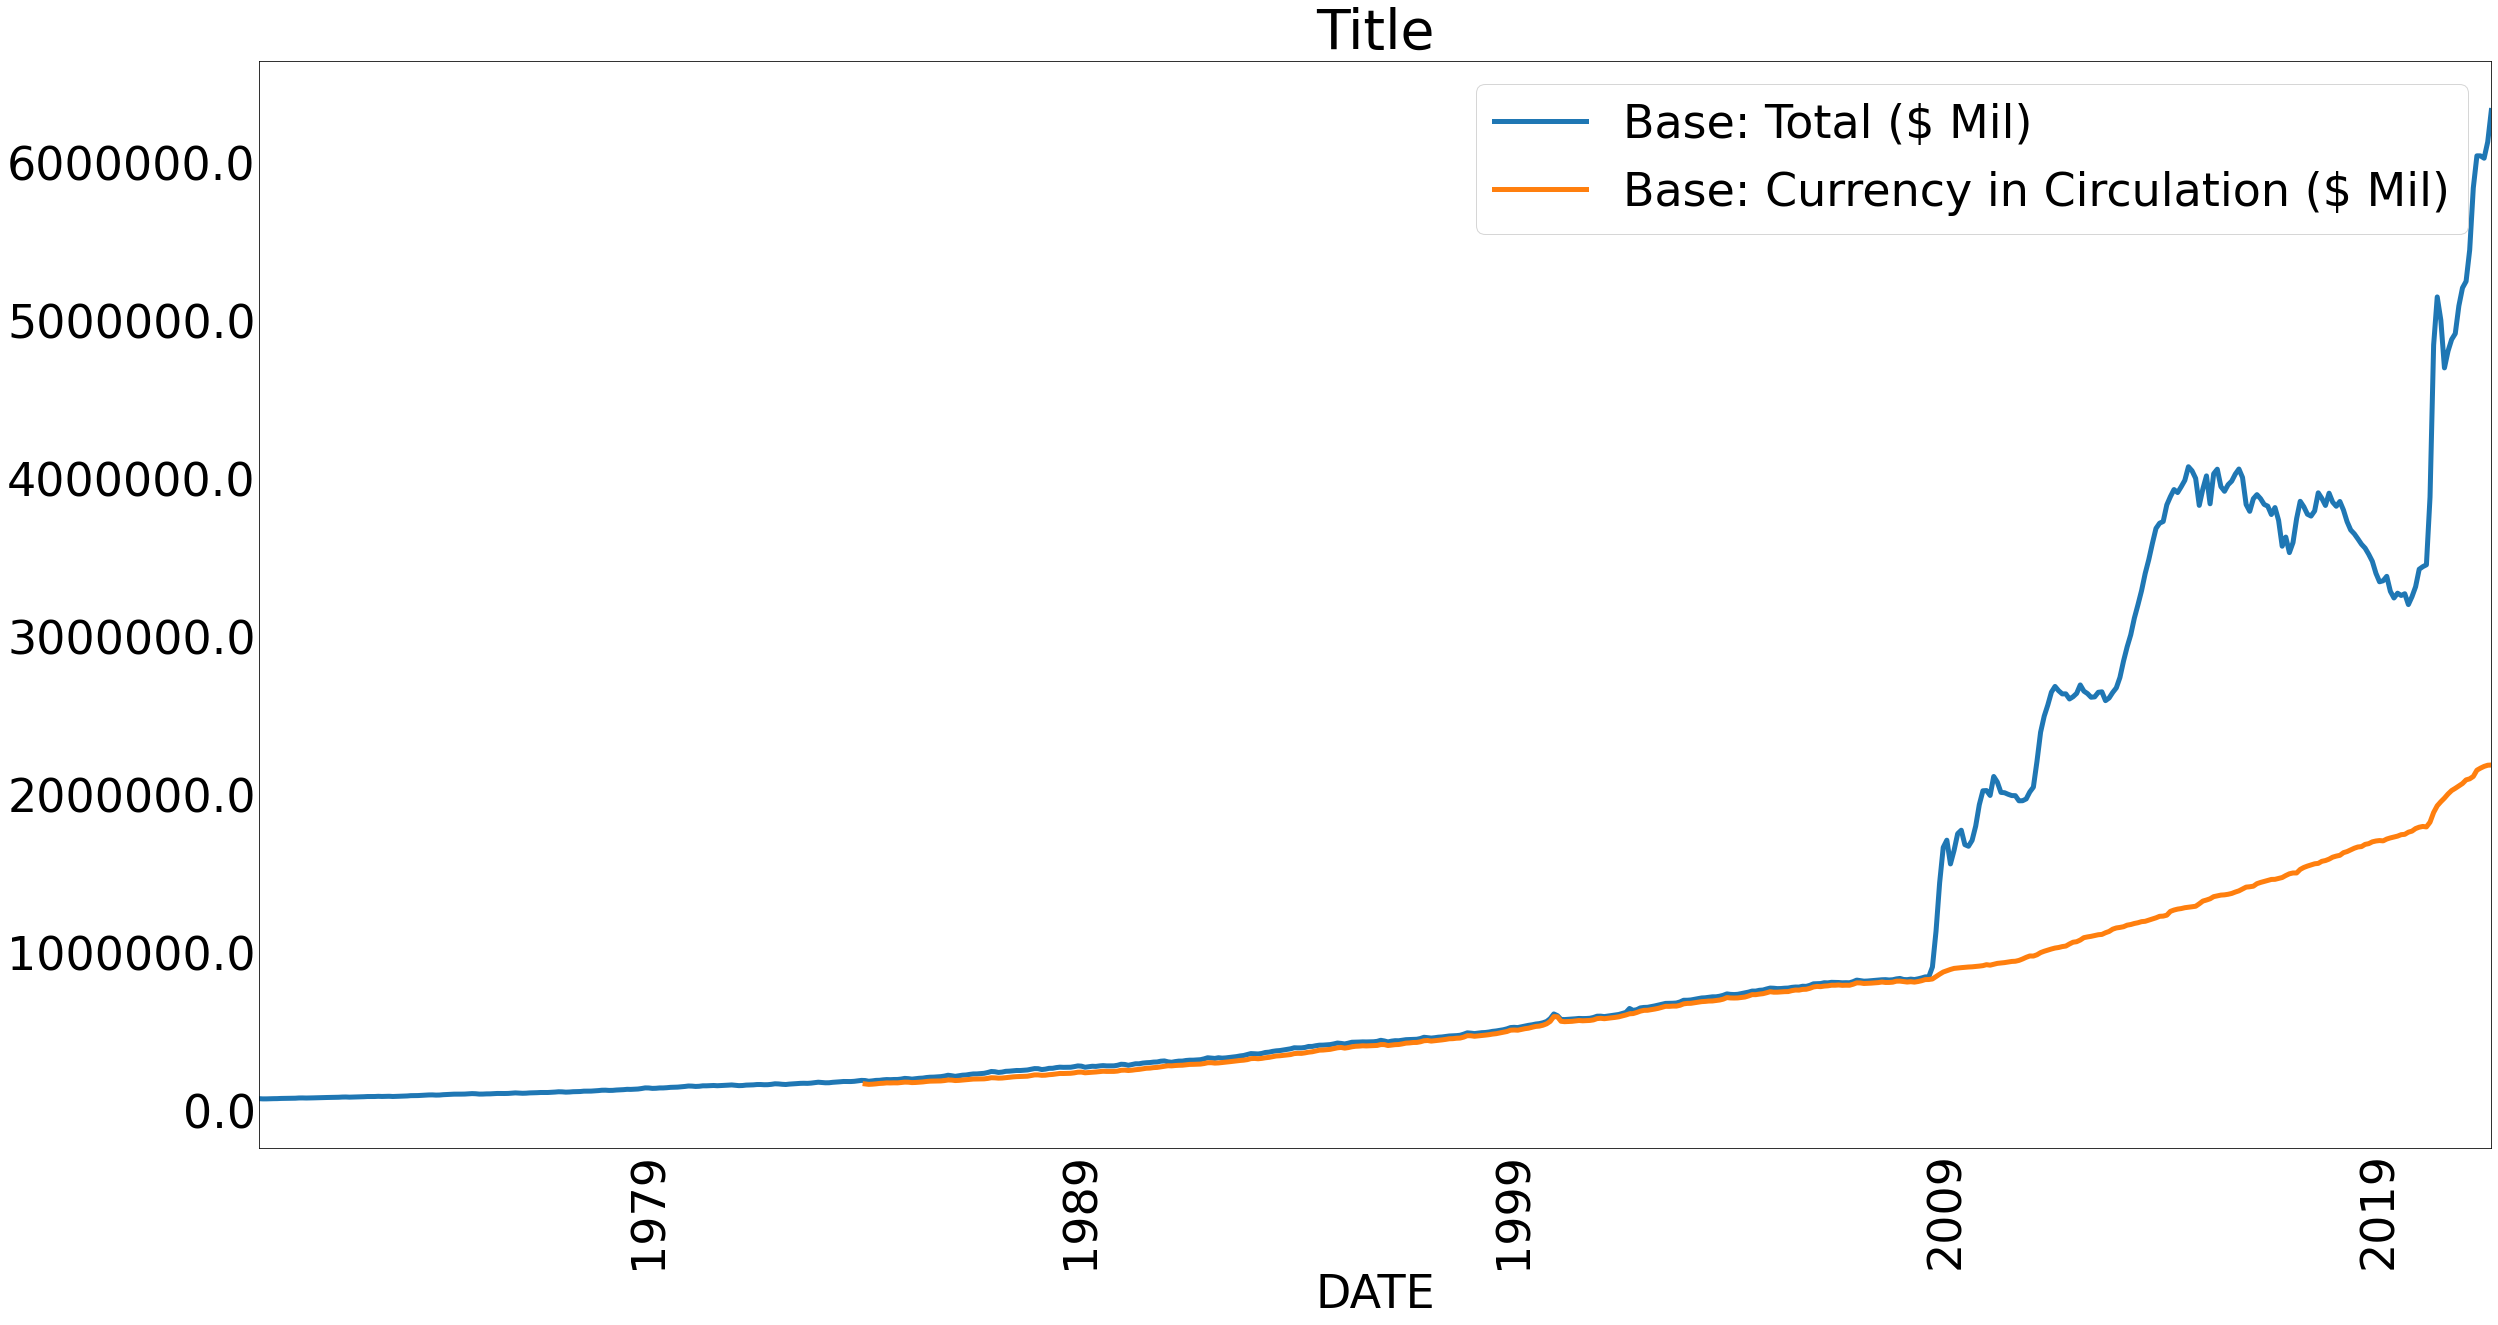

In [8]:
# Allows you to save the image as a pdf
pp = PdfPages("Monetary Base Measures.pdf")

plt.rcParams.update({"font.size": 46})
plot_vars = ["Base: Total ($ Mil)",
            "Base: Currency in Circulation ($ Mil)"]
# Creates a dataframe with specific variables
plot_df = data[plot_vars]
plot_lines(plot_df, title = "Title", linewidth = 5, pp = pp)
pp.close()

# Stacked Lines

In [9]:
def plot_stacked_lines(df, plot_vars, linewidth = 1, figsize = (40,20),
                       pp = None, total_var = False,
                      ncol = 2):
    fig, ax = plt.subplots(figsize = figsize)
    df[plot_vars].plot.area(stacked = True, linewidth = linewidth, ax = ax)
    
    # Changes y values to millions from trillions
    if total_var != False:
        df[total_var].plot.line(linewidth = linewidth, ax = ax, c = "b",
                               label = total_var, ls = "--")
    ax.legend(loc = 2, ncol = ncol)
    if pp != None: pp.savefig(
                        fig, 
                        bbox_inches = "tight")

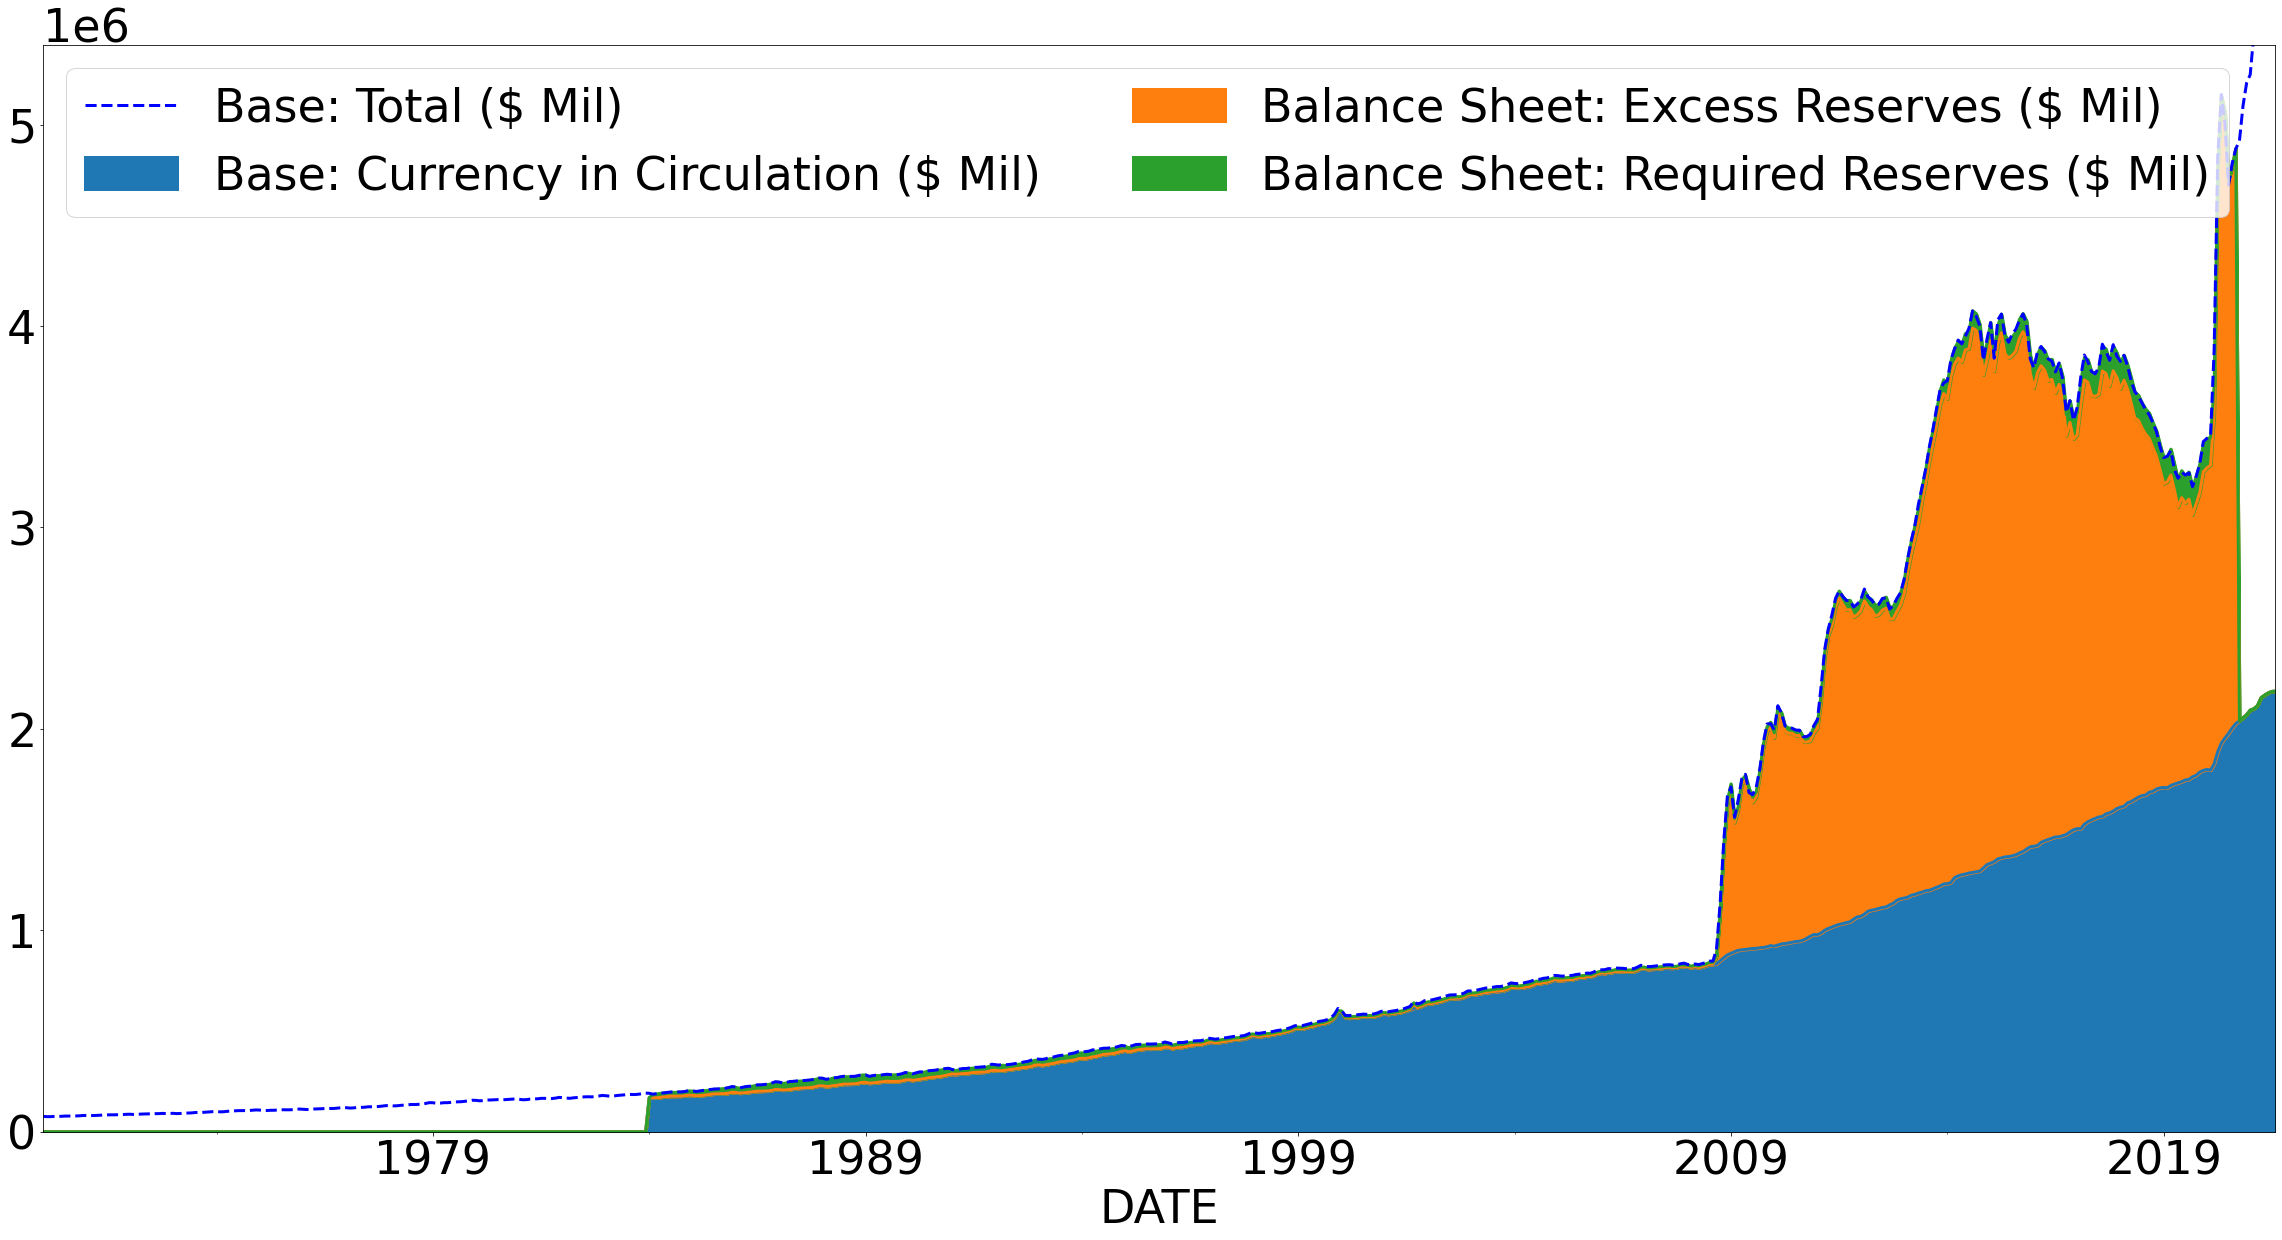

In [10]:
pp = PdfPages("Stacked Plots.pdf")

money_vars = ["Base: Currency in Circulation ($ Mil)",
              "Balance Sheet: Excess Reserves ($ Mil)",
             "Balance Sheet: Required Reserves ($ Mil)"]

total_var = "Base: Total ($ Mil)"
plot_stacked_lines(data,
                  money_vars,
                  linewidth = 3,
                  total_var = total_var,
                  pp = pp)

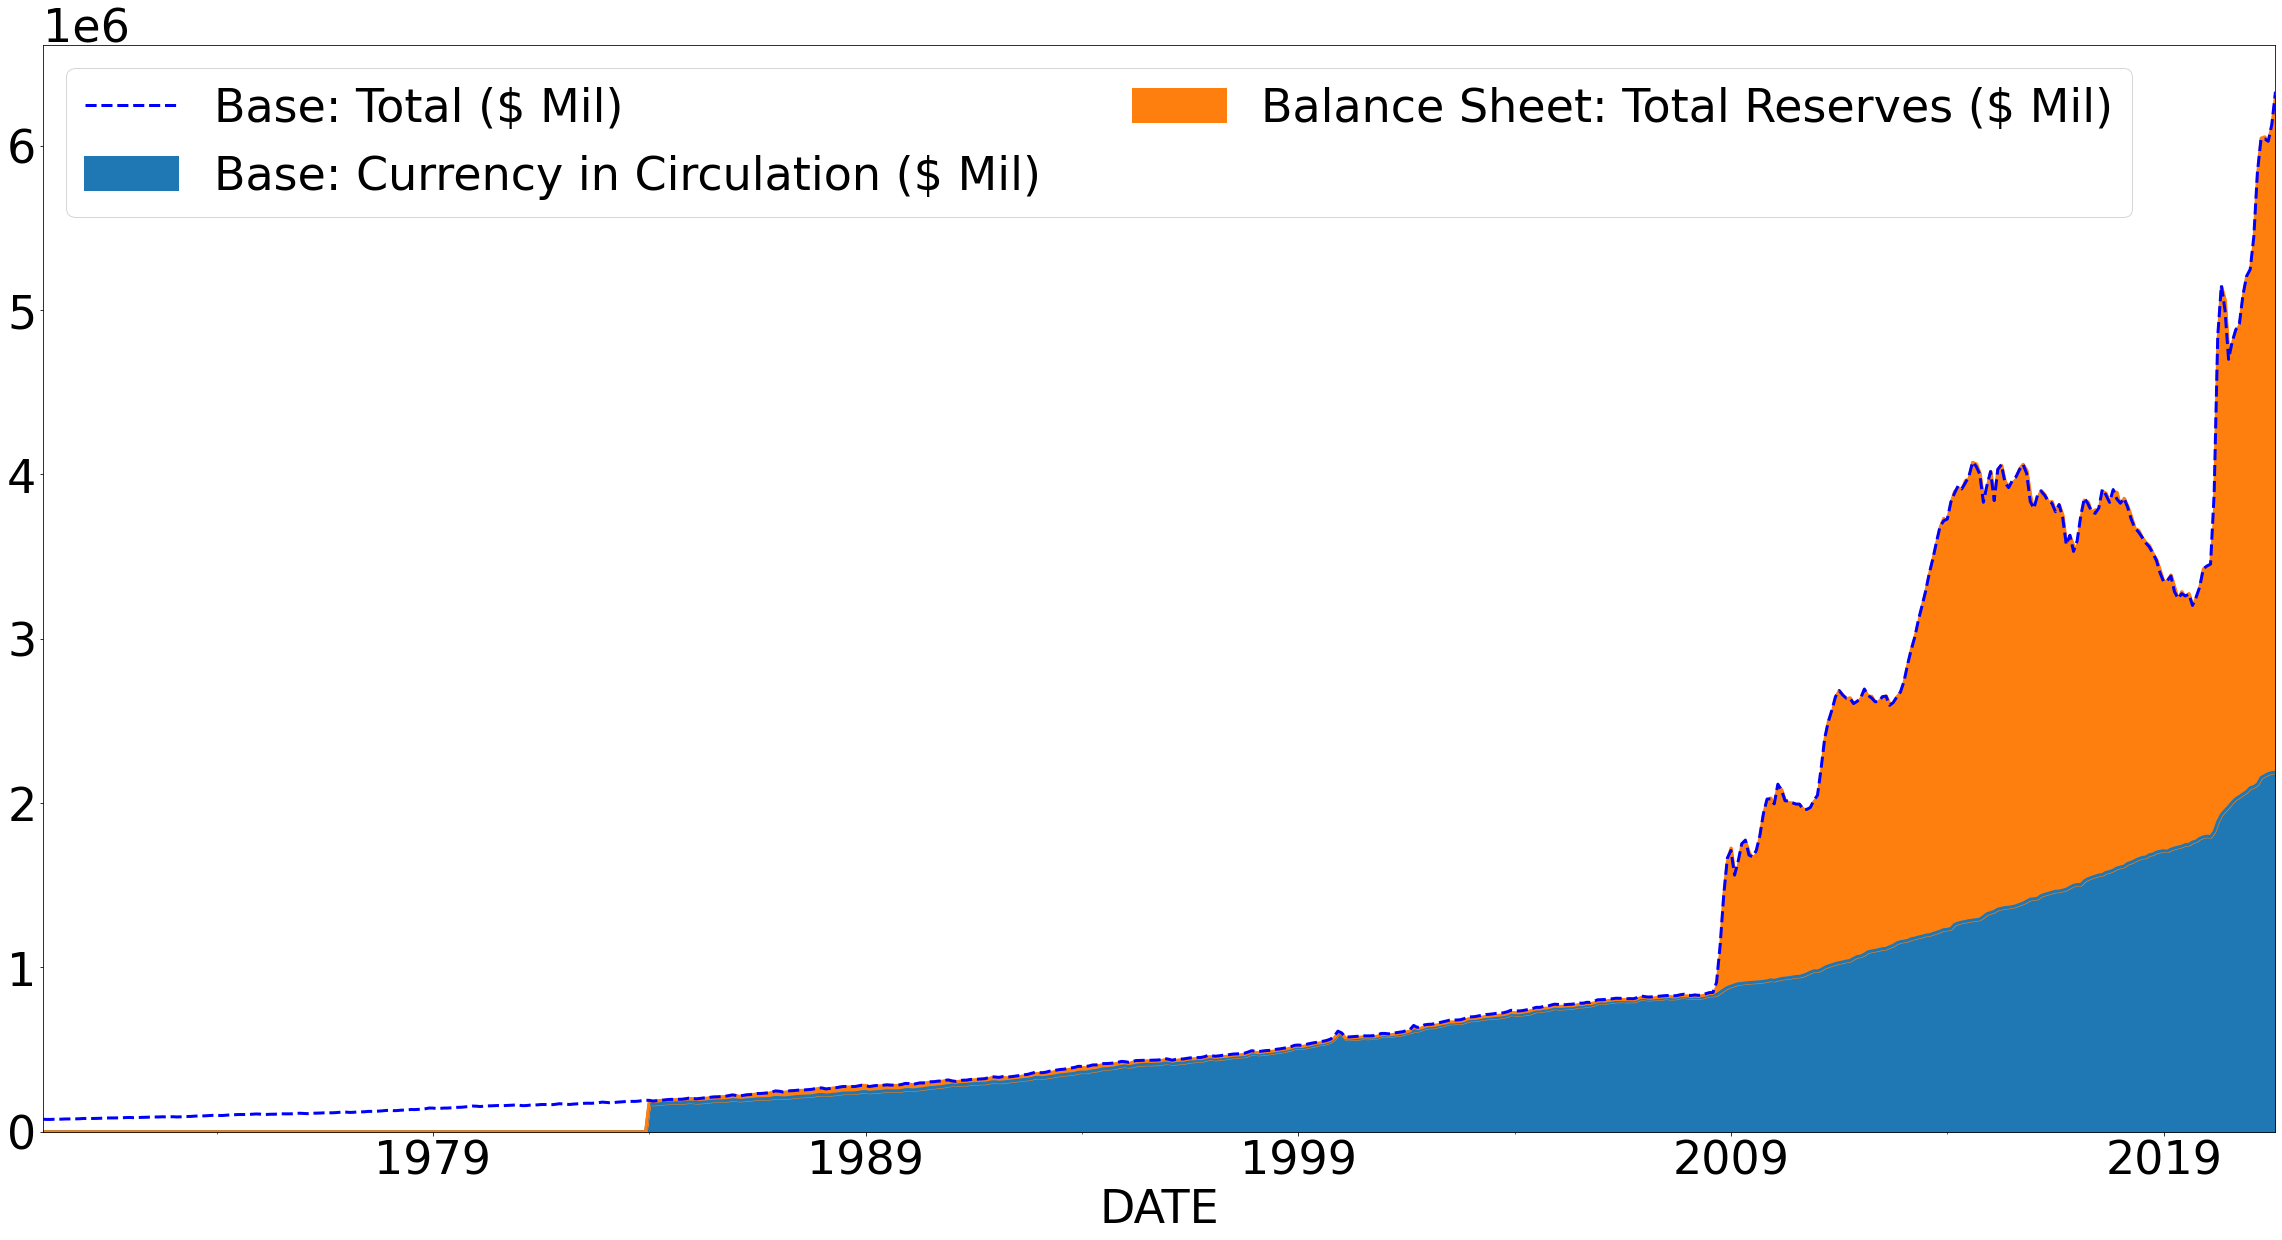

In [11]:
money_vars = ["Base: Currency in Circulation ($ Mil)",
              "Balance Sheet: Total Reserves ($ Mil)"]
total_var = "Base: Total ($ Mil)"
plot_stacked_lines(data,
                  money_vars,
                  linewidth = 3,
                  total_var = total_var,
                  pp = pp)

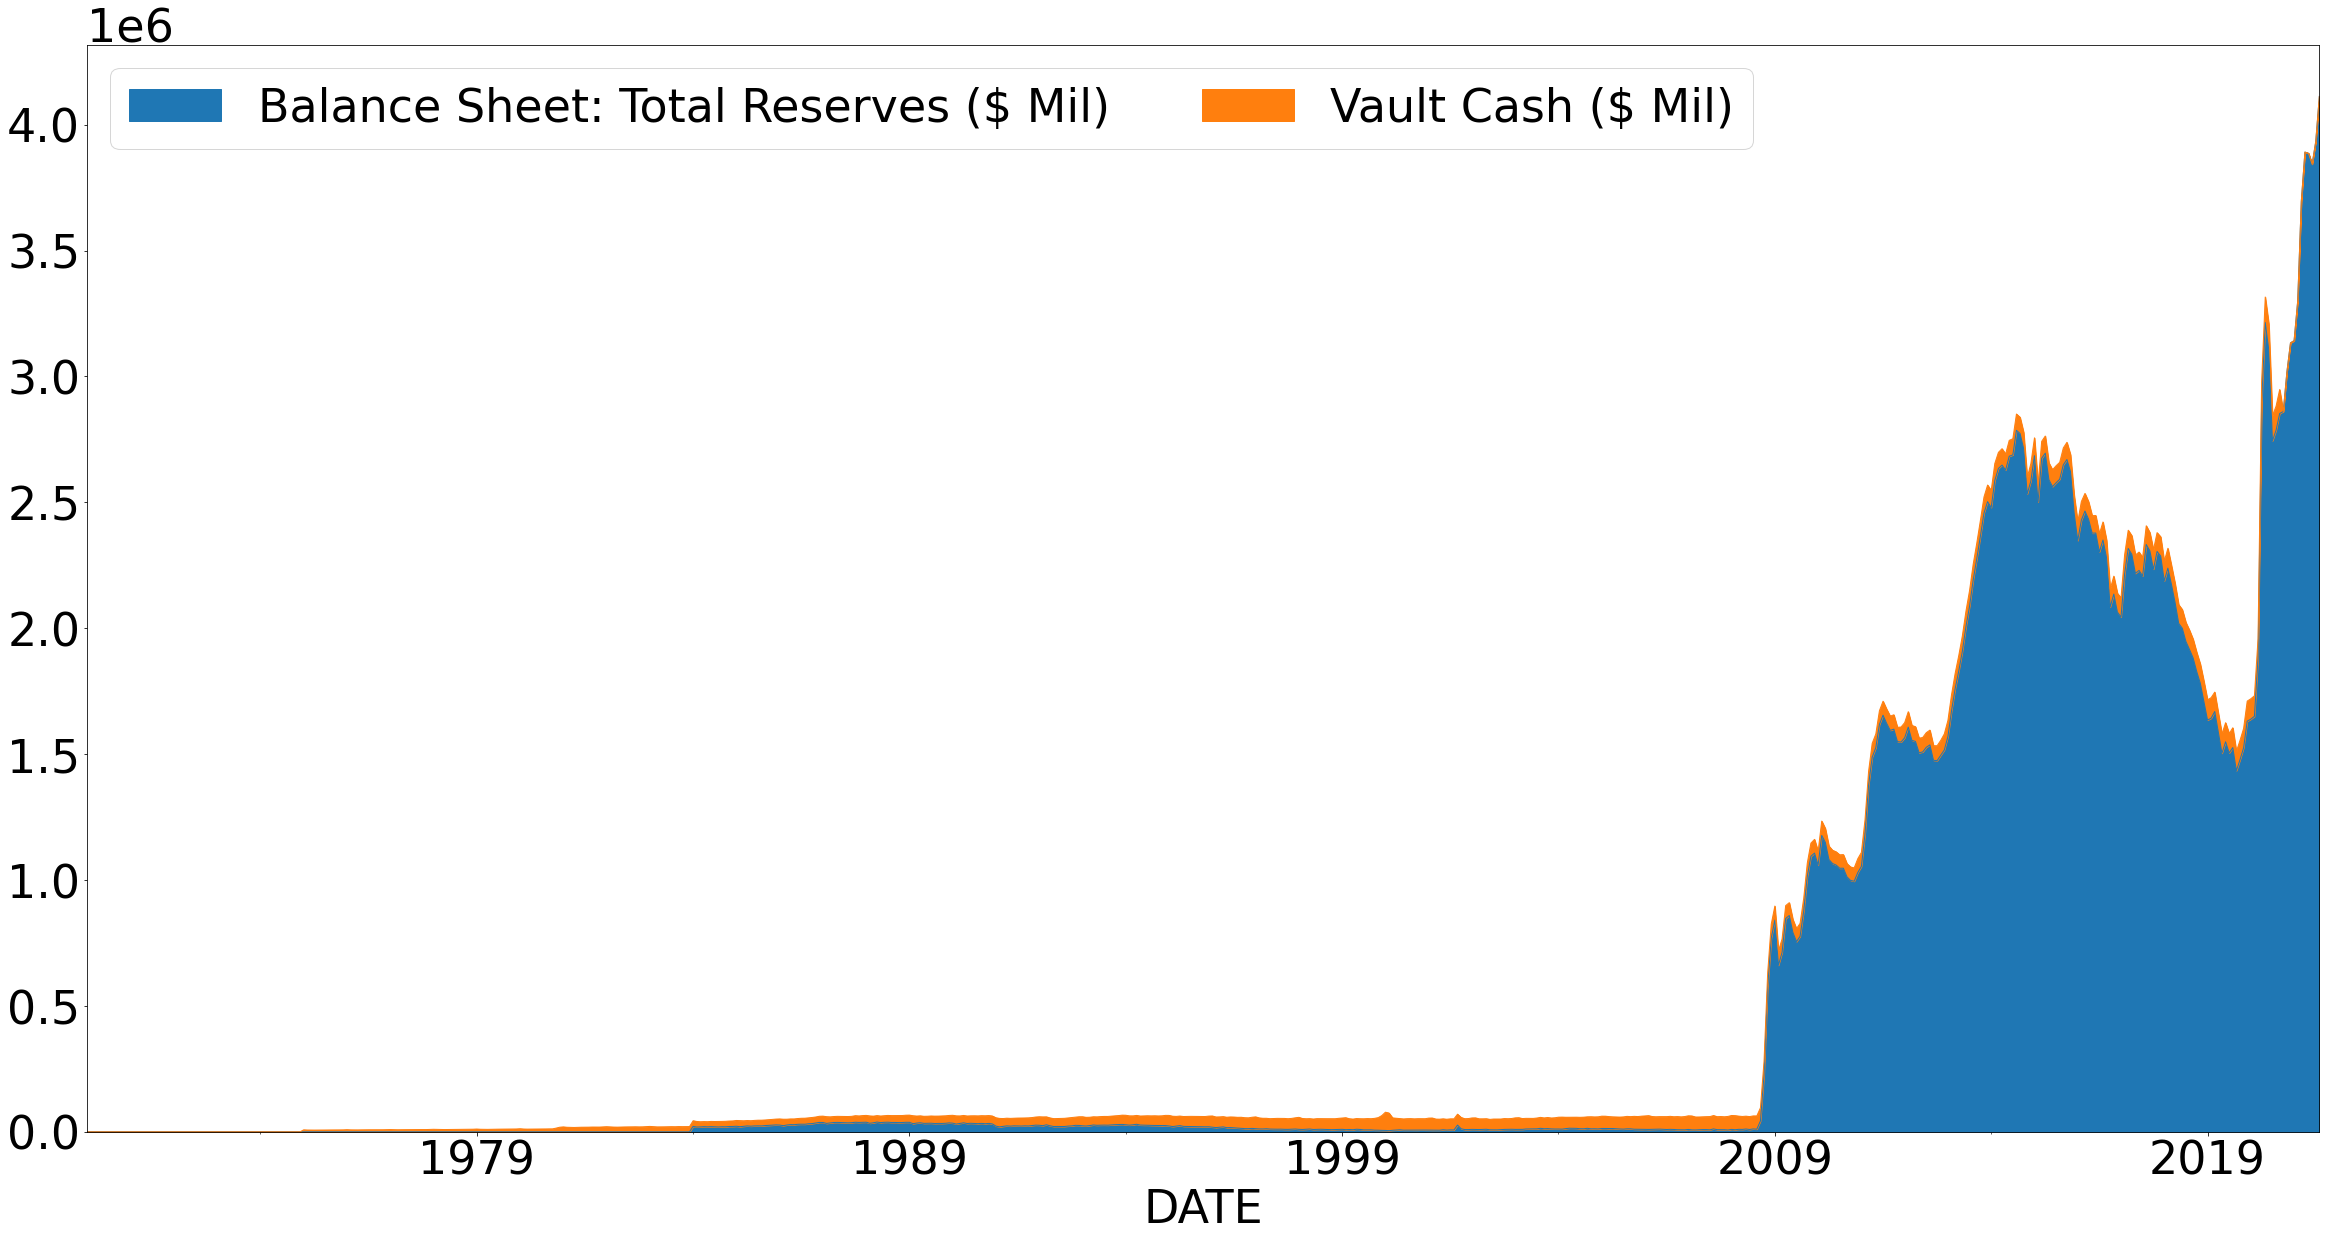

In [12]:
reserve_vars = ["Balance Sheet: Total Reserves ($ Mil)",
                "Vault Cash ($ Mil)"]
plot_stacked_lines(data, reserve_vars, pp = pp)

In [13]:
data["Excess Reserves ($ Mil)"] = data["Vault Cash ($ Mil)"].sub(
    data["Vault Cash Used as Req. ($ Mil)"])

In [14]:
# Checking to see the entries
data["Vault Cash Used as Req. ($ Mil)"]

DATE
1970-01-31    5.277
1970-02-28    4.863
1970-03-31    4.732
1970-04-30    4.772
1970-05-31    4.805
              ...  
2021-04-30      NaN
2021-05-31      NaN
2021-06-30      NaN
2021-07-31      NaN
2021-08-31      NaN
Freq: M, Name: Vault Cash Used as Req. ($ Mil), Length: 620, dtype: float64

In [15]:
# Making sure there are actual values
data["Excess Reserves ($ Mil)"].values

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
         7820.461,   7093.685,   6833.419,   6857.529,   6916.08 ,
         6930.78 ,   7182.585,   7292.95 ,   7385.069,   7343.678,
         7332.641,   7741.228,   8458.567,   7700.103,   7465.

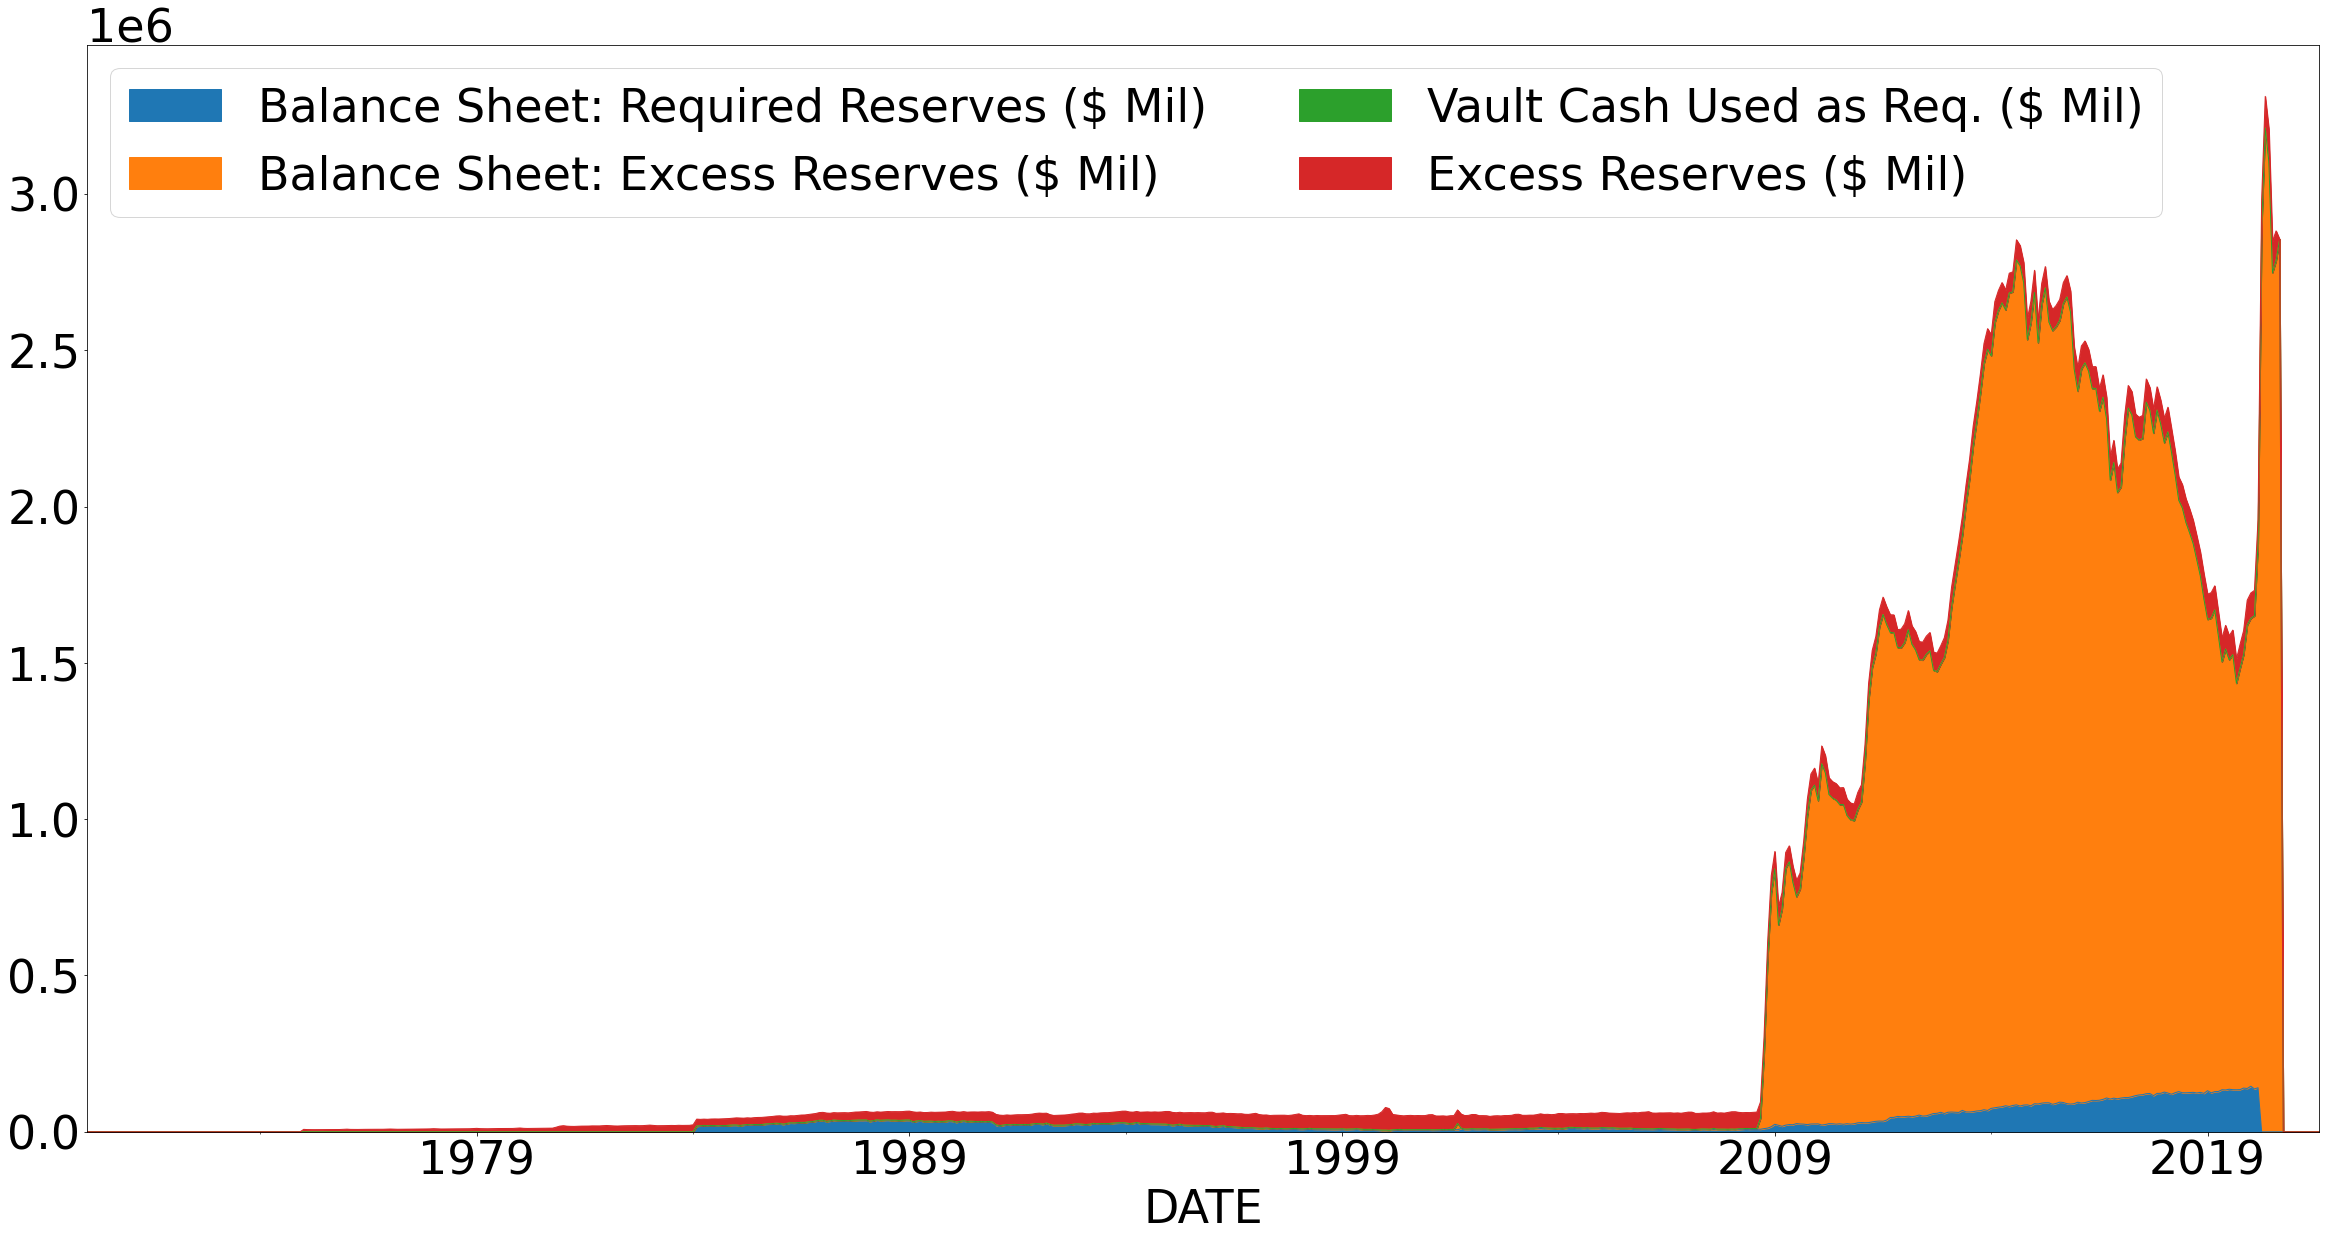

In [16]:
reserve_vars = ["Balance Sheet: Required Reserves ($ Mil)",
               "Balance Sheet: Excess Reserves ($ Mil)",
               "Vault Cash Used as Req. ($ Mil)",
               "Excess Reserves ($ Mil)"]
plot_stacked_lines(data, reserve_vars, pp = pp)

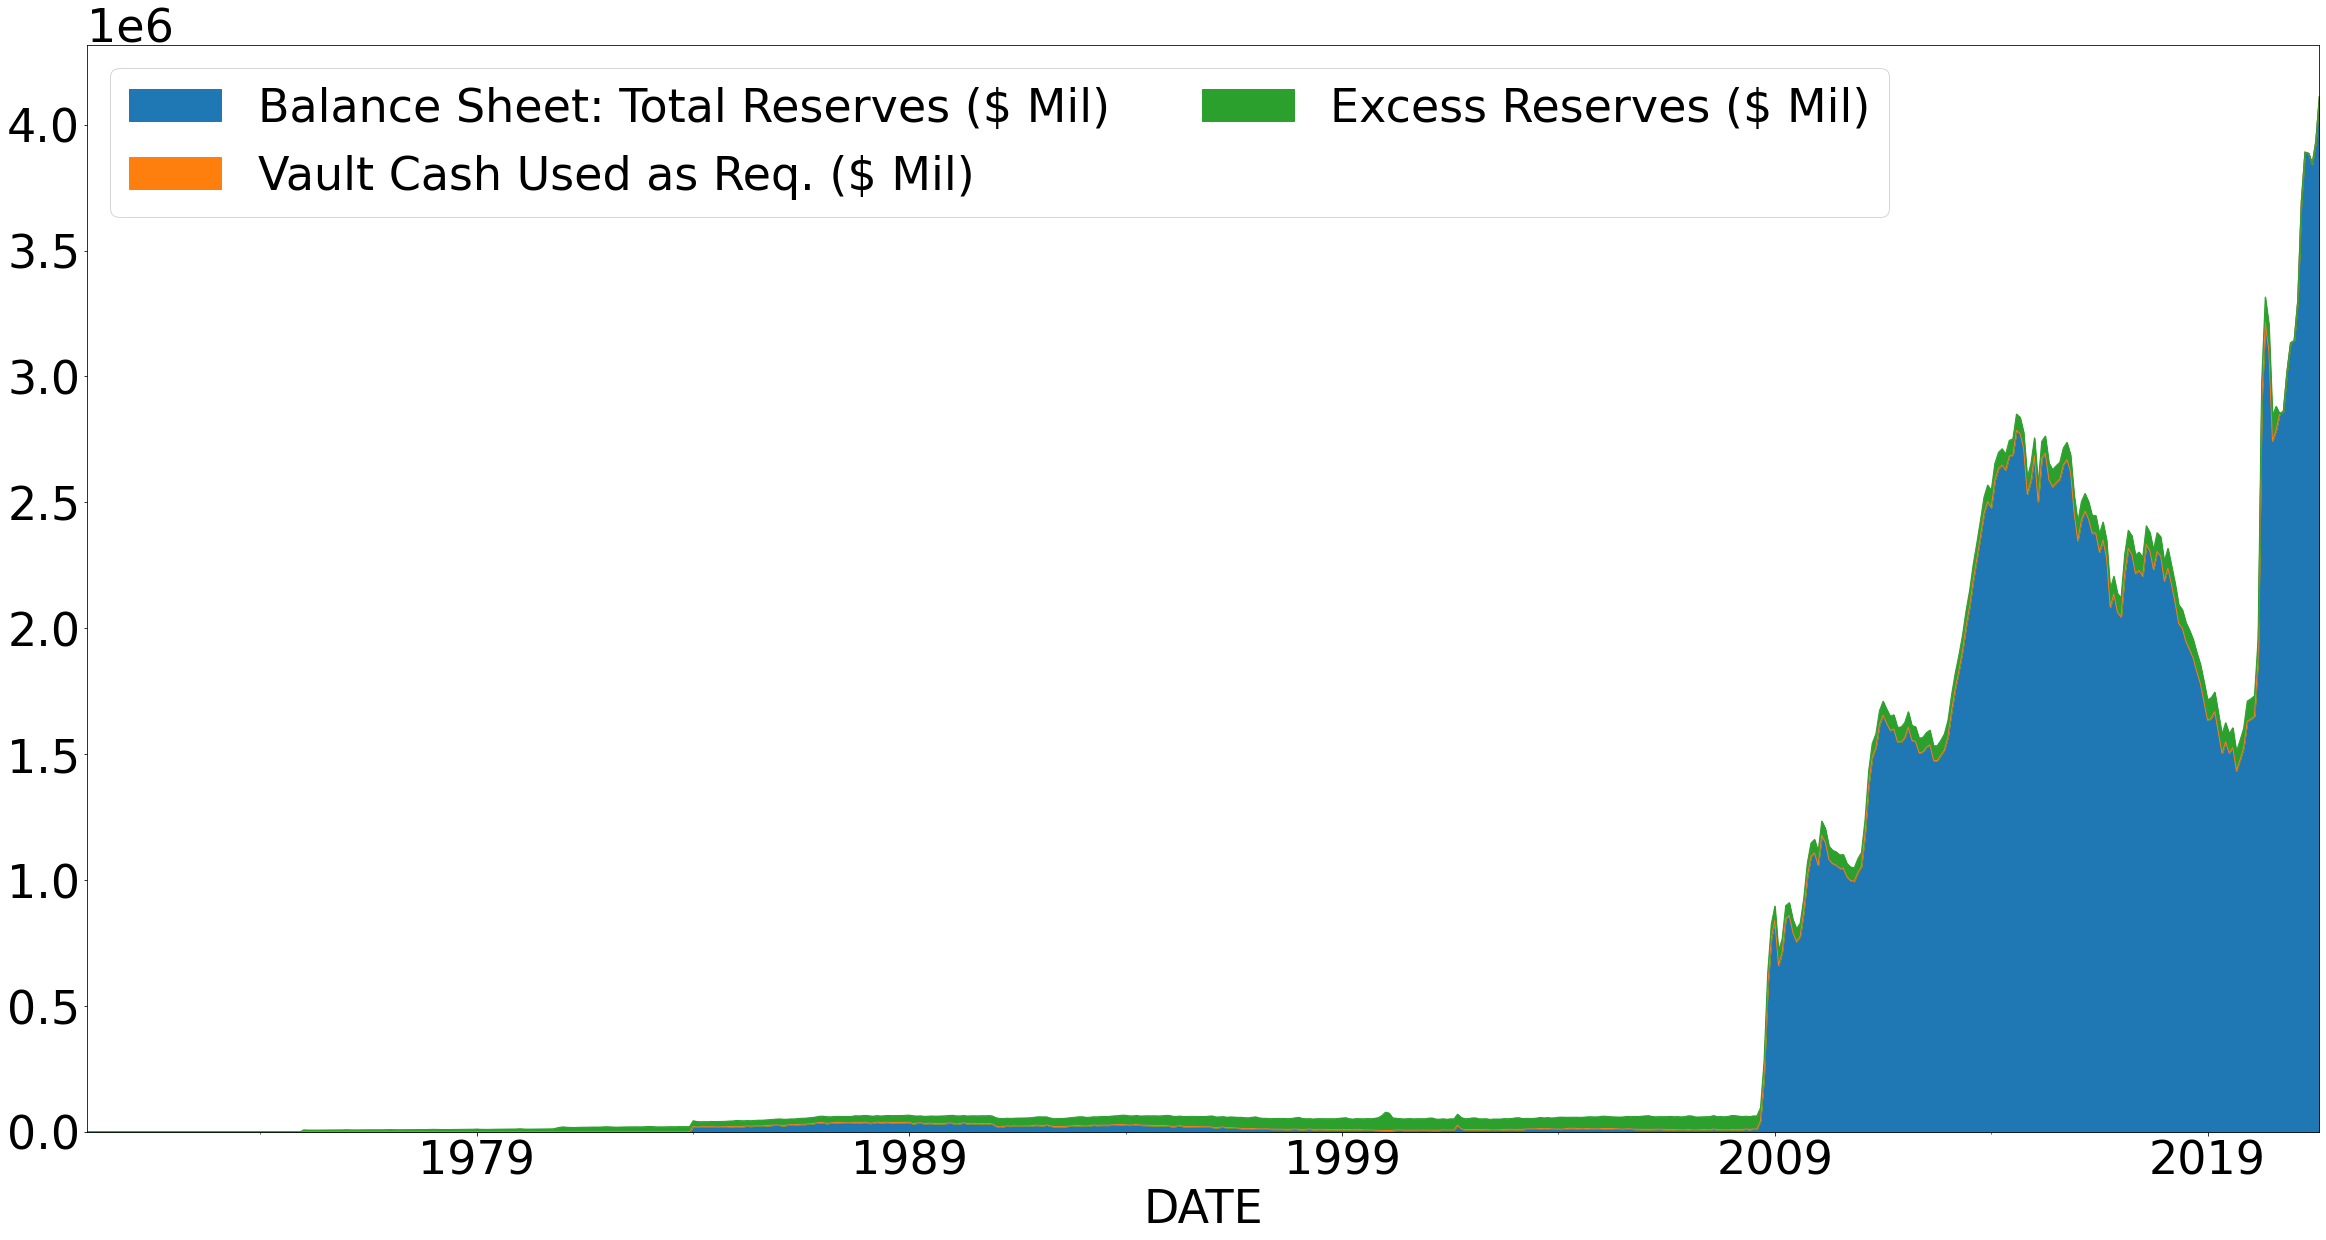

In [17]:
reserve_vars = ["Balance Sheet: Total Reserves ($ Mil)",
               "Vault Cash Used as Req. ($ Mil)",
               "Excess Reserves ($ Mil)"]
plot_stacked_lines(data, reserve_vars, pp = pp)

# Assets Held by the Federal Reserve

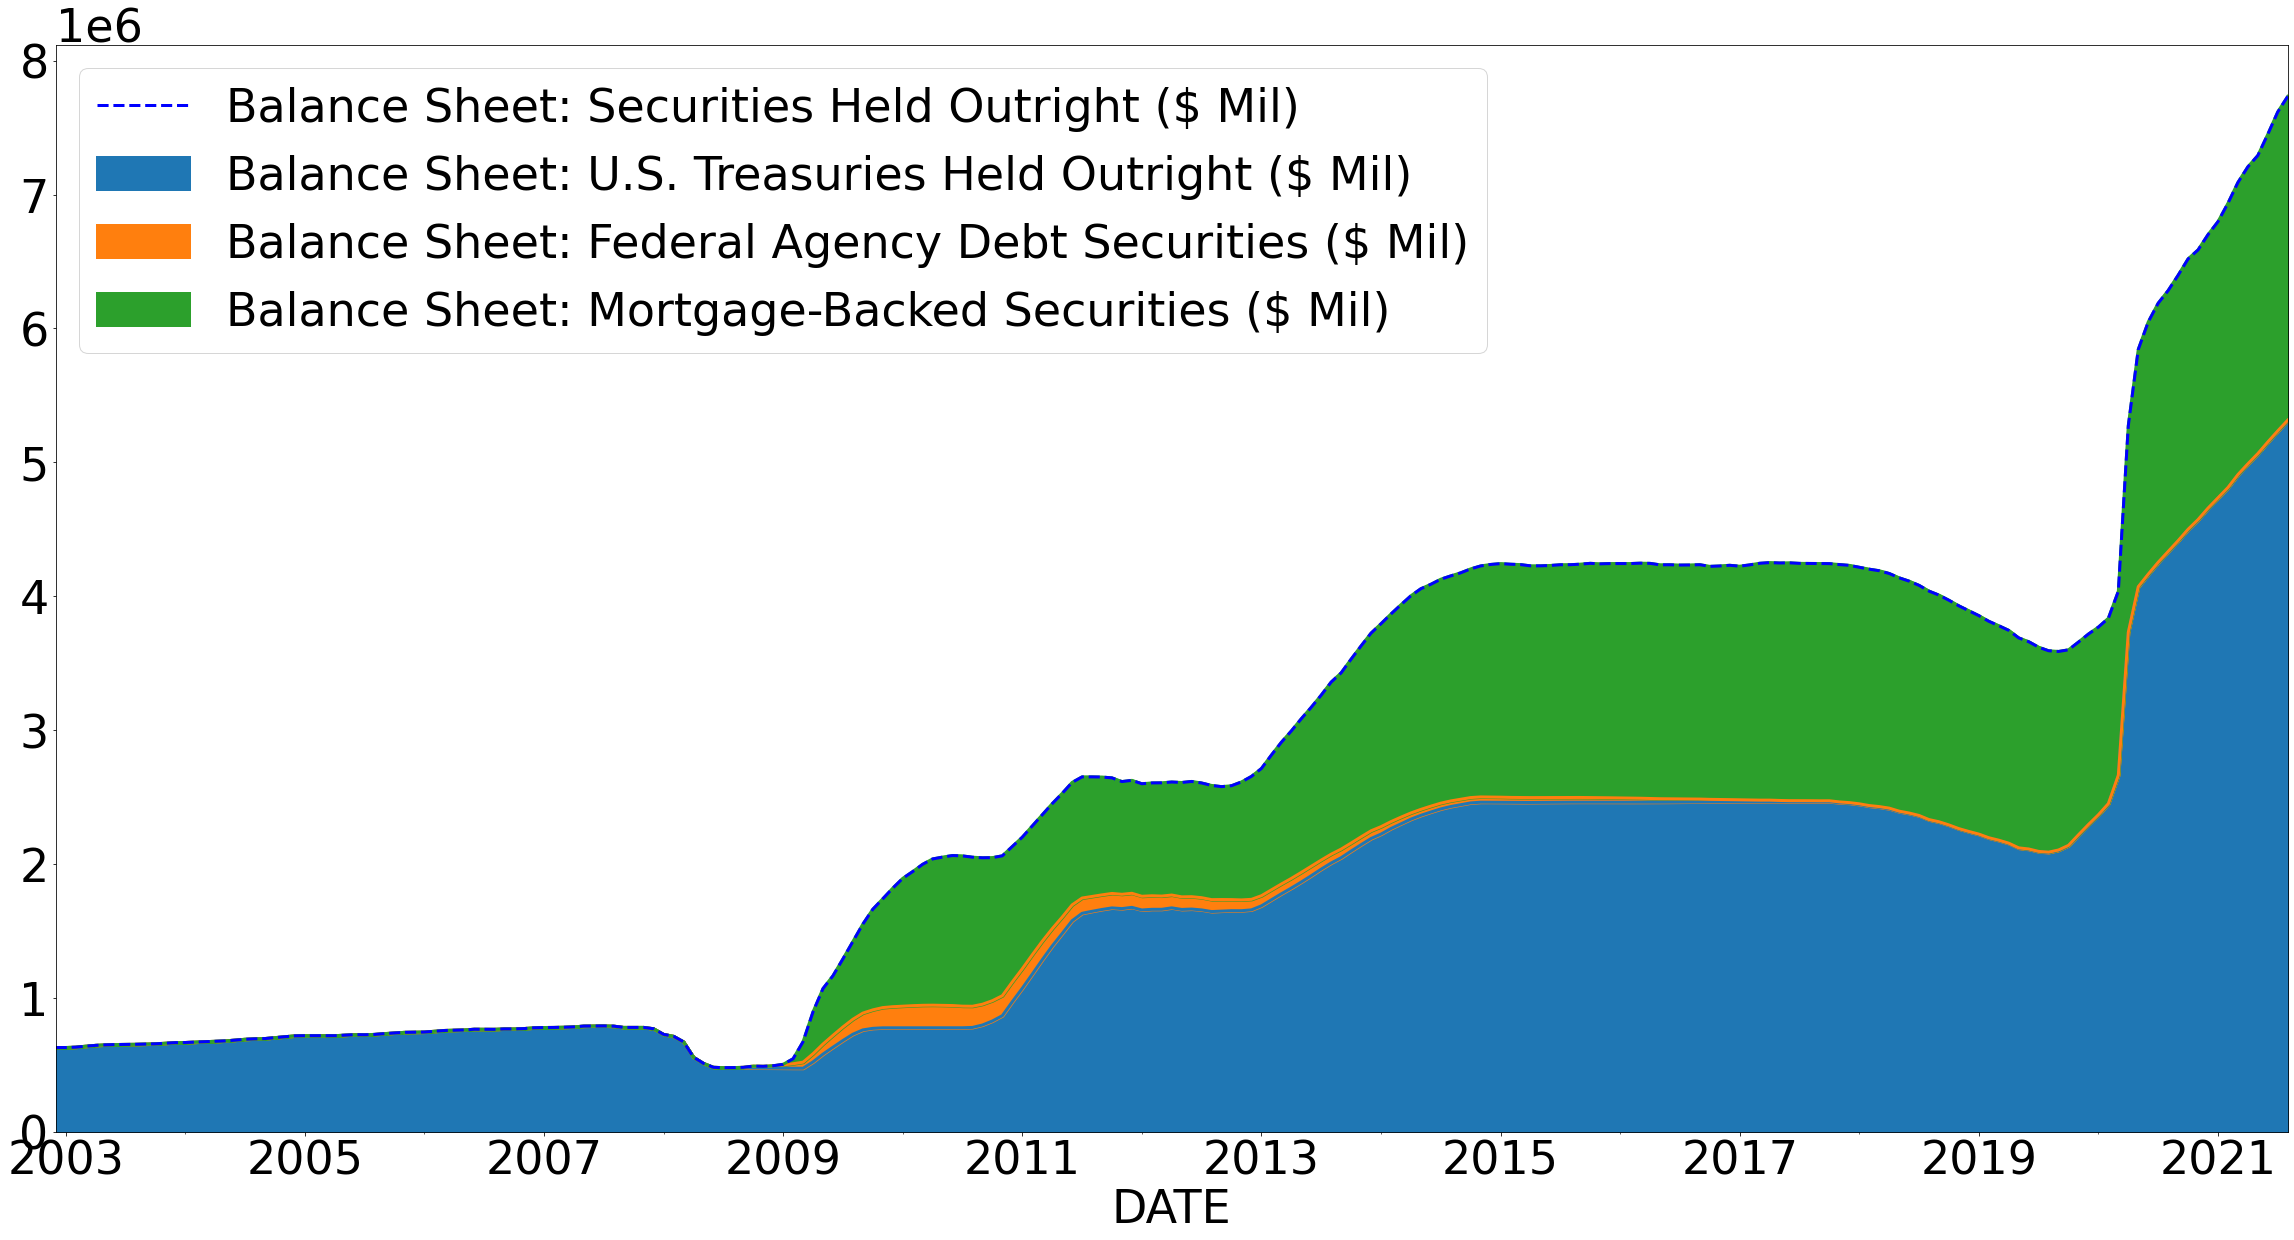

In [18]:
# Federal Agency Debt Securities is from Fannie Mac, Freddie Mac, and Fed Home Loan banks
asset_vars = ["Balance Sheet: U.S. Treasuries Held Outright ($ Mil)",
             "Balance Sheet: Federal Agency Debt Securities ($ Mil)",
             "Balance Sheet: Mortgage-Backed Securities ($ Mil)"]
# The .loc sets the x axis to make it look much better
plot_stacked_lines(data.loc["2002-12-31":], 
                   asset_vars, 
                   linewidth = 3, 
                   total_var = "Balance Sheet: Securities Held Outright ($ Mil)",
                  pp = pp, 
                   ncol = 1)
# Used ncol here to make the legend one column. Makes it all fit on the same
# section. ncol is from Stacked Lines (Line 9: def plot_stacked_lines).

# Securities Held Outright

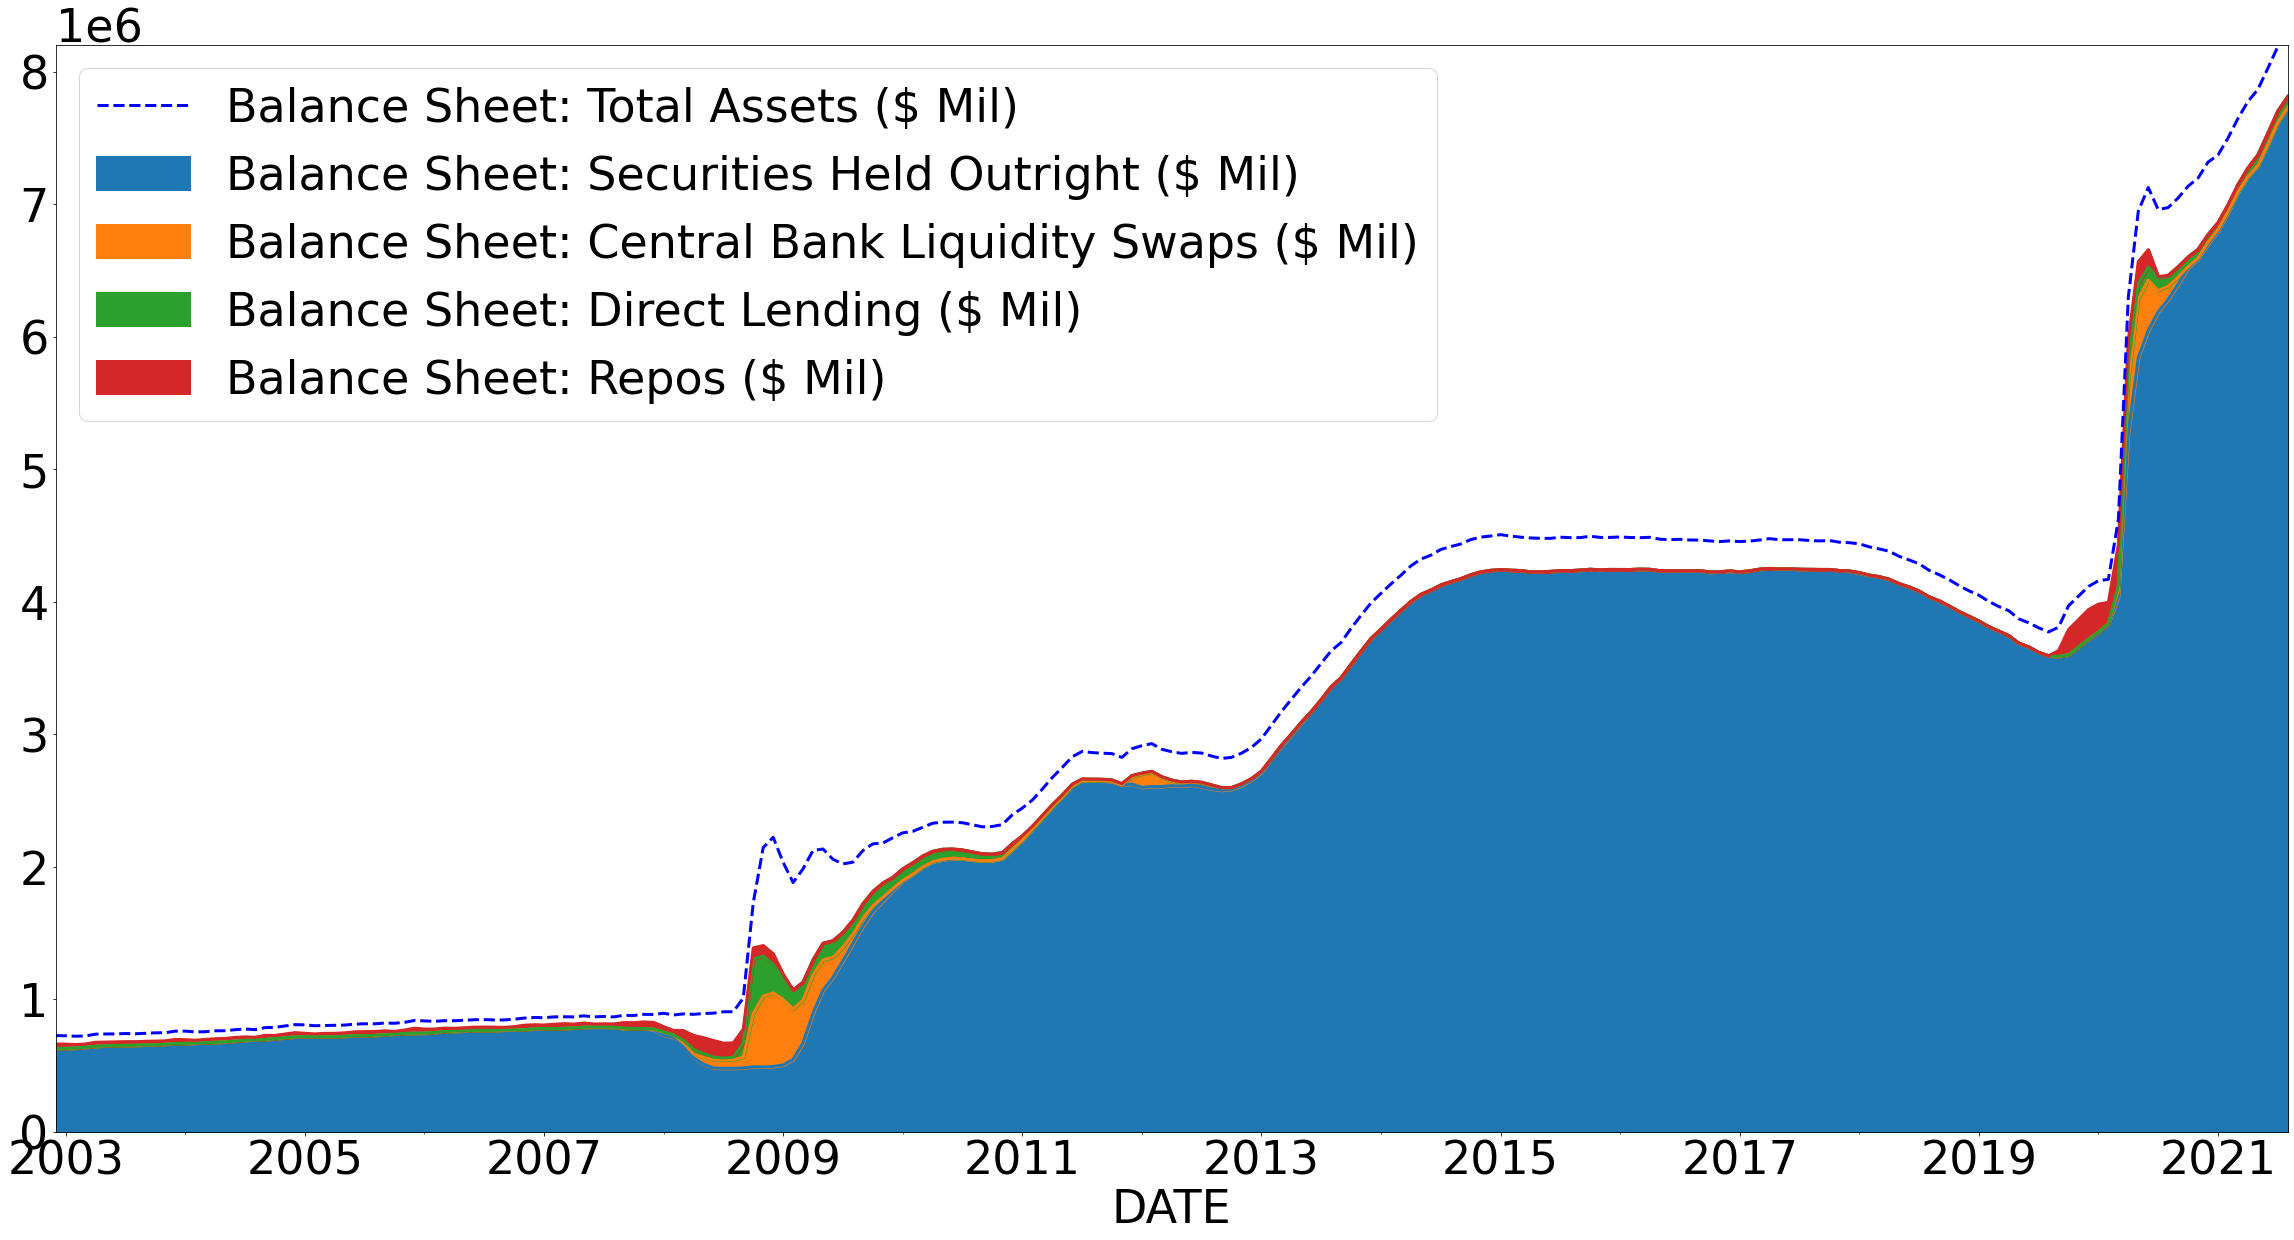

In [19]:
asset_vars = ["Balance Sheet: Securities Held Outright ($ Mil)",
            "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)",
            "Balance Sheet: Direct Lending ($ Mil)",
            "Balance Sheet: Repos ($ Mil)"]

plot_stacked_lines(data.loc["2002-12-31":], 
                   asset_vars, 
                   linewidth = 3,
                  total_var = "Balance Sheet: Total Assets ($ Mil)",
                  ncol = 1,
                  pp = pp)

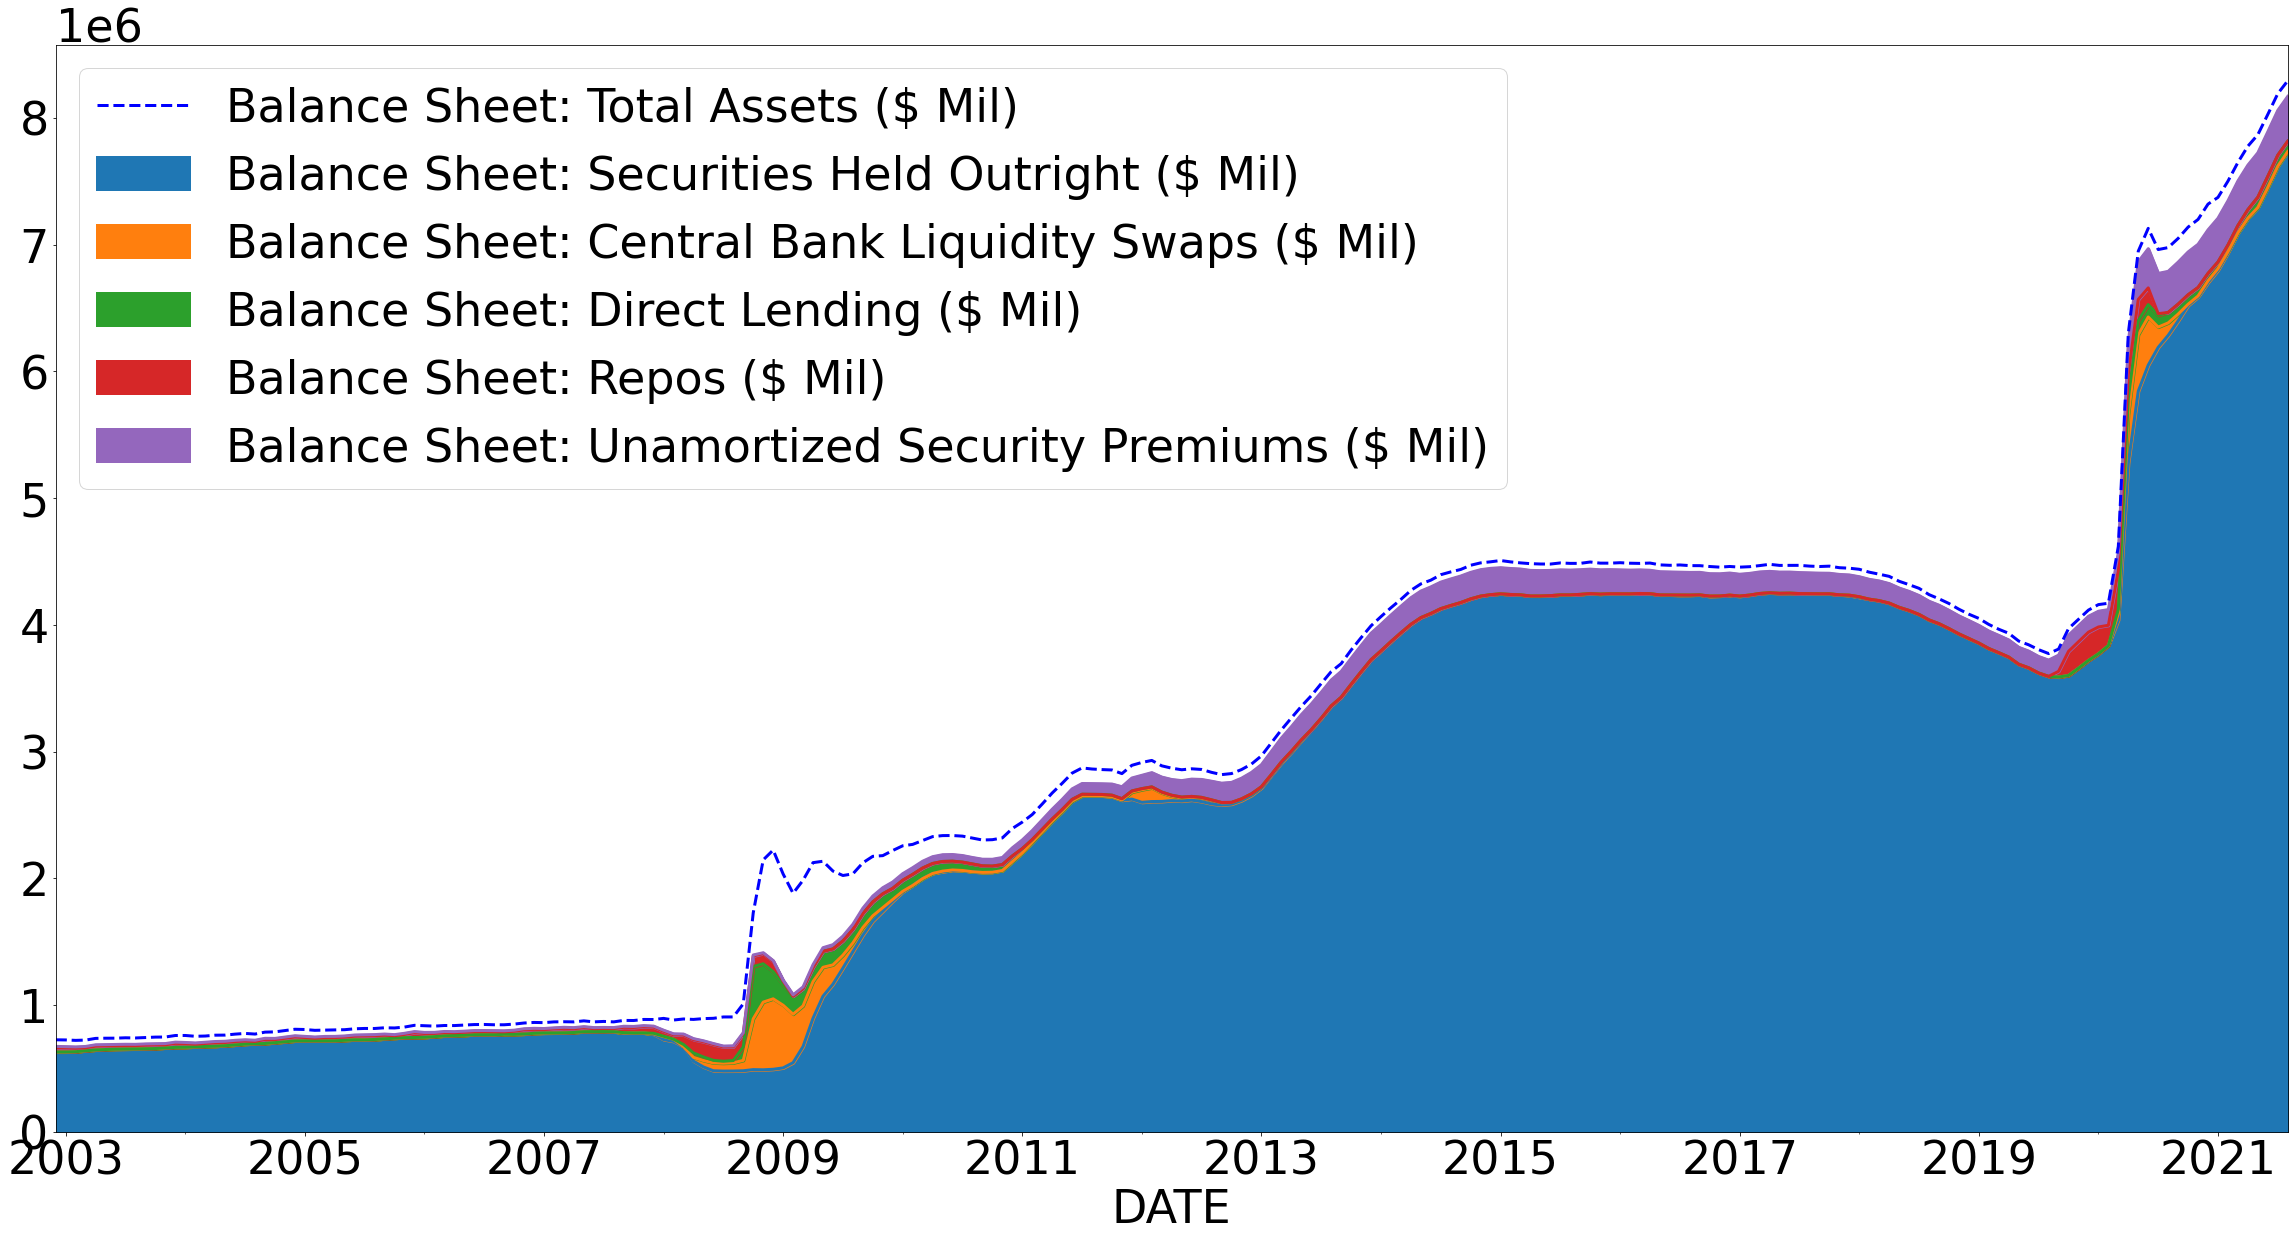

In [20]:
# Same as previous chart, but added the Security Premiums - Fills in more 
# of the white space between the blue line
asset_vars = ["Balance Sheet: Securities Held Outright ($ Mil)",
            "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)",
            "Balance Sheet: Direct Lending ($ Mil)",
            "Balance Sheet: Repos ($ Mil)",
             "Balance Sheet: Unamortized Security Premiums ($ Mil)"]

plot_stacked_lines(data.loc["2002-12-31":], 
                   asset_vars, 
                   linewidth = 3,
                  total_var = "Balance Sheet: Total Assets ($ Mil)",
                  ncol = 1,
                  pp = pp)

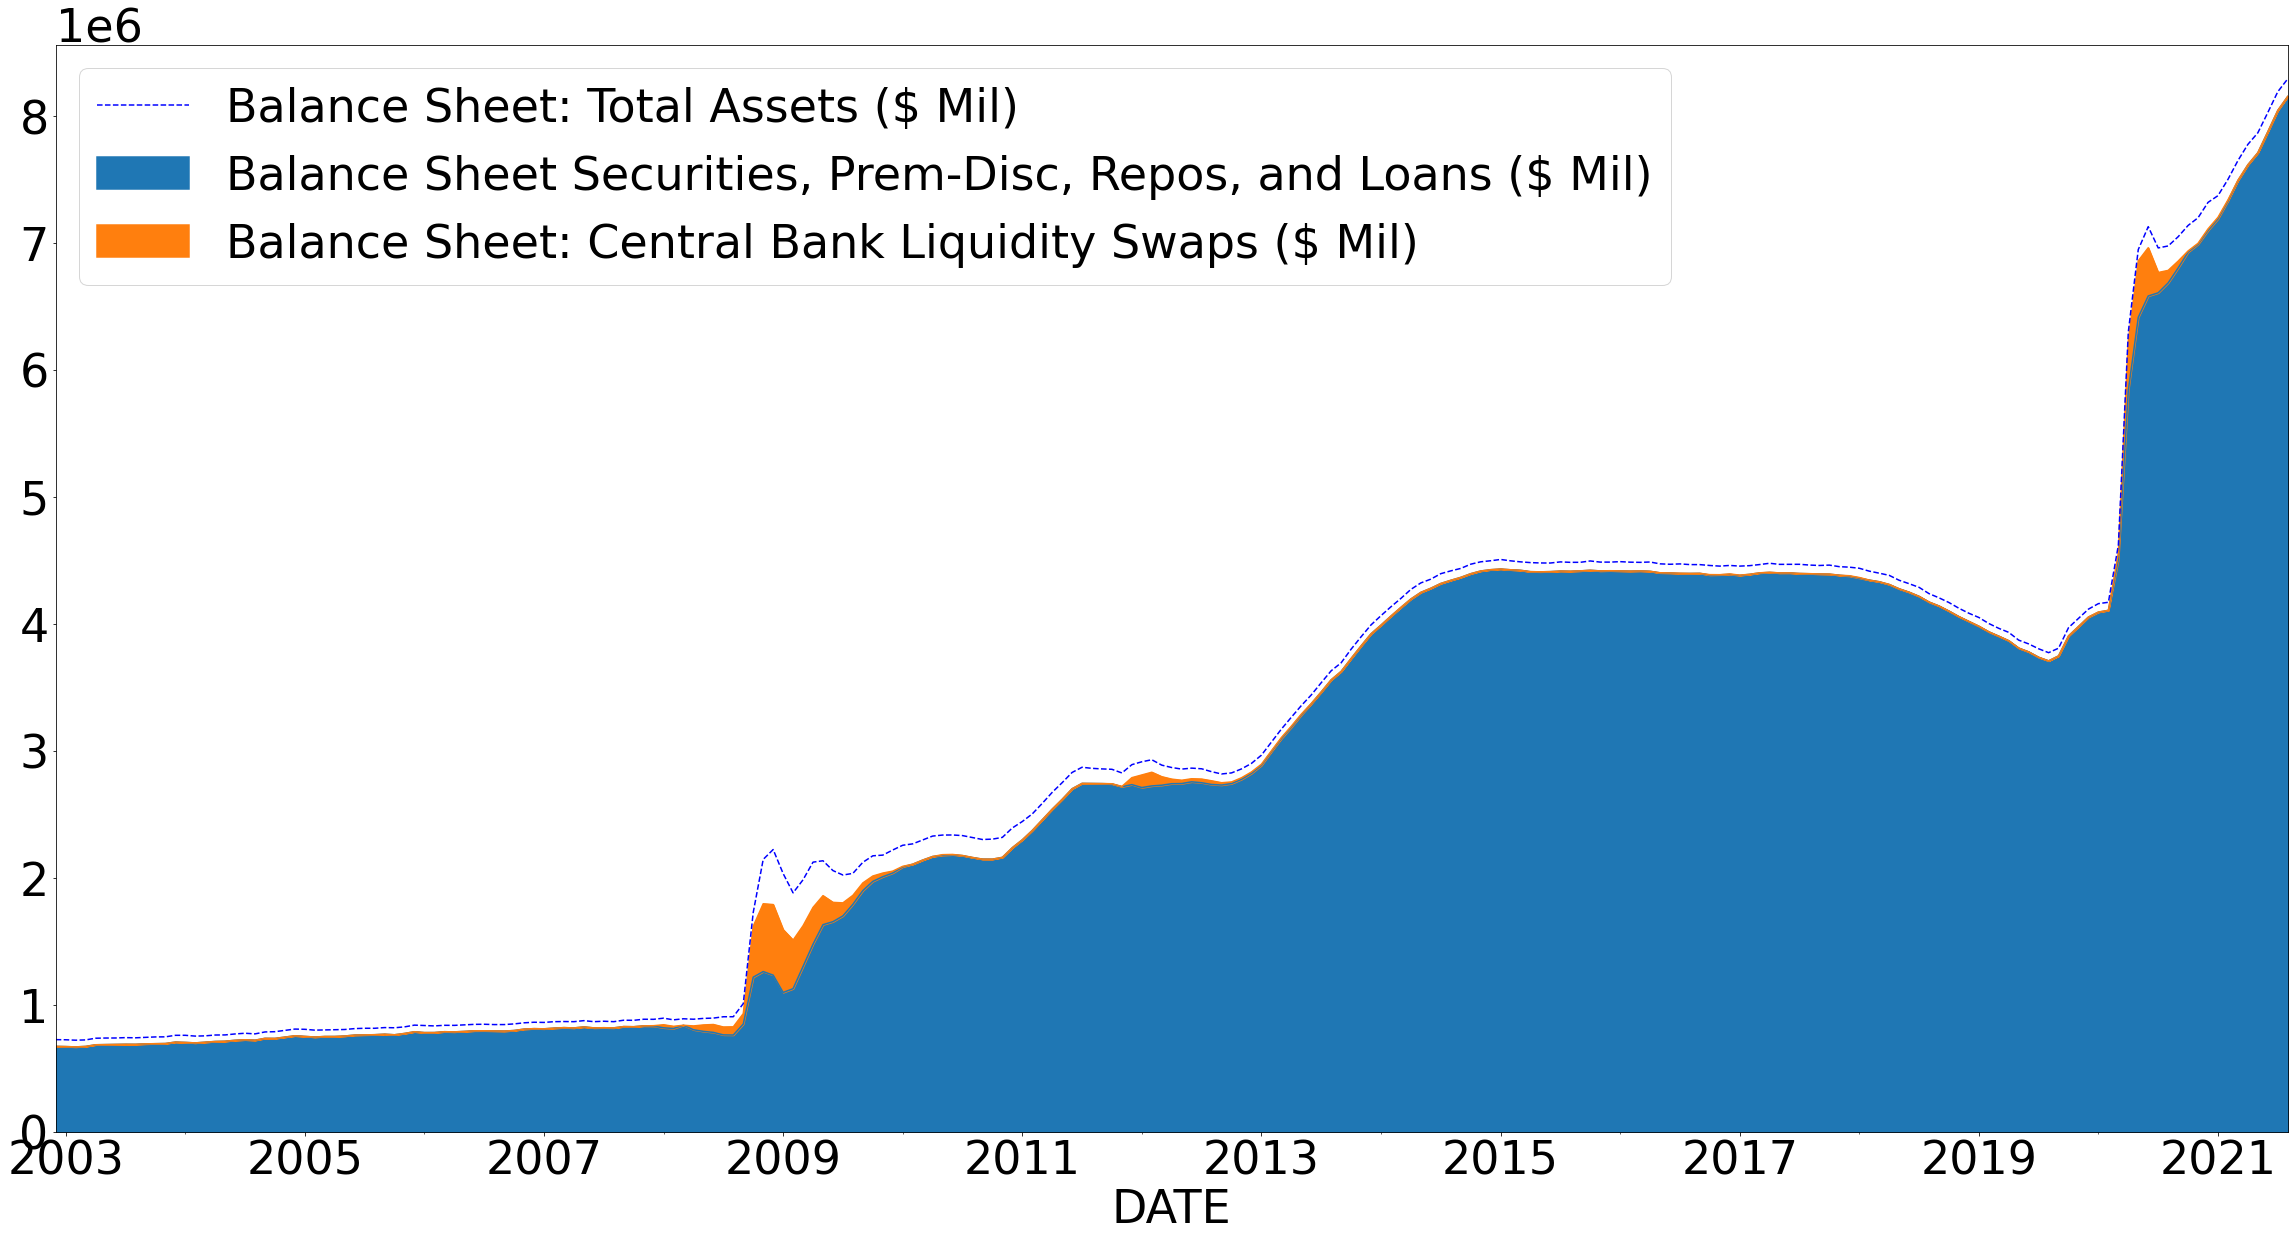

In [21]:
account_vars = ["Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)",
                "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)"]

plot_stacked_lines(data.loc["2002-12-31":], 
                   account_vars, 
                   linewidth = 1.5, 
                   total_var = "Balance Sheet: Total Assets ($ Mil)",
                  pp = pp,
                  ncol = 1)

## Liabilities Fed Res

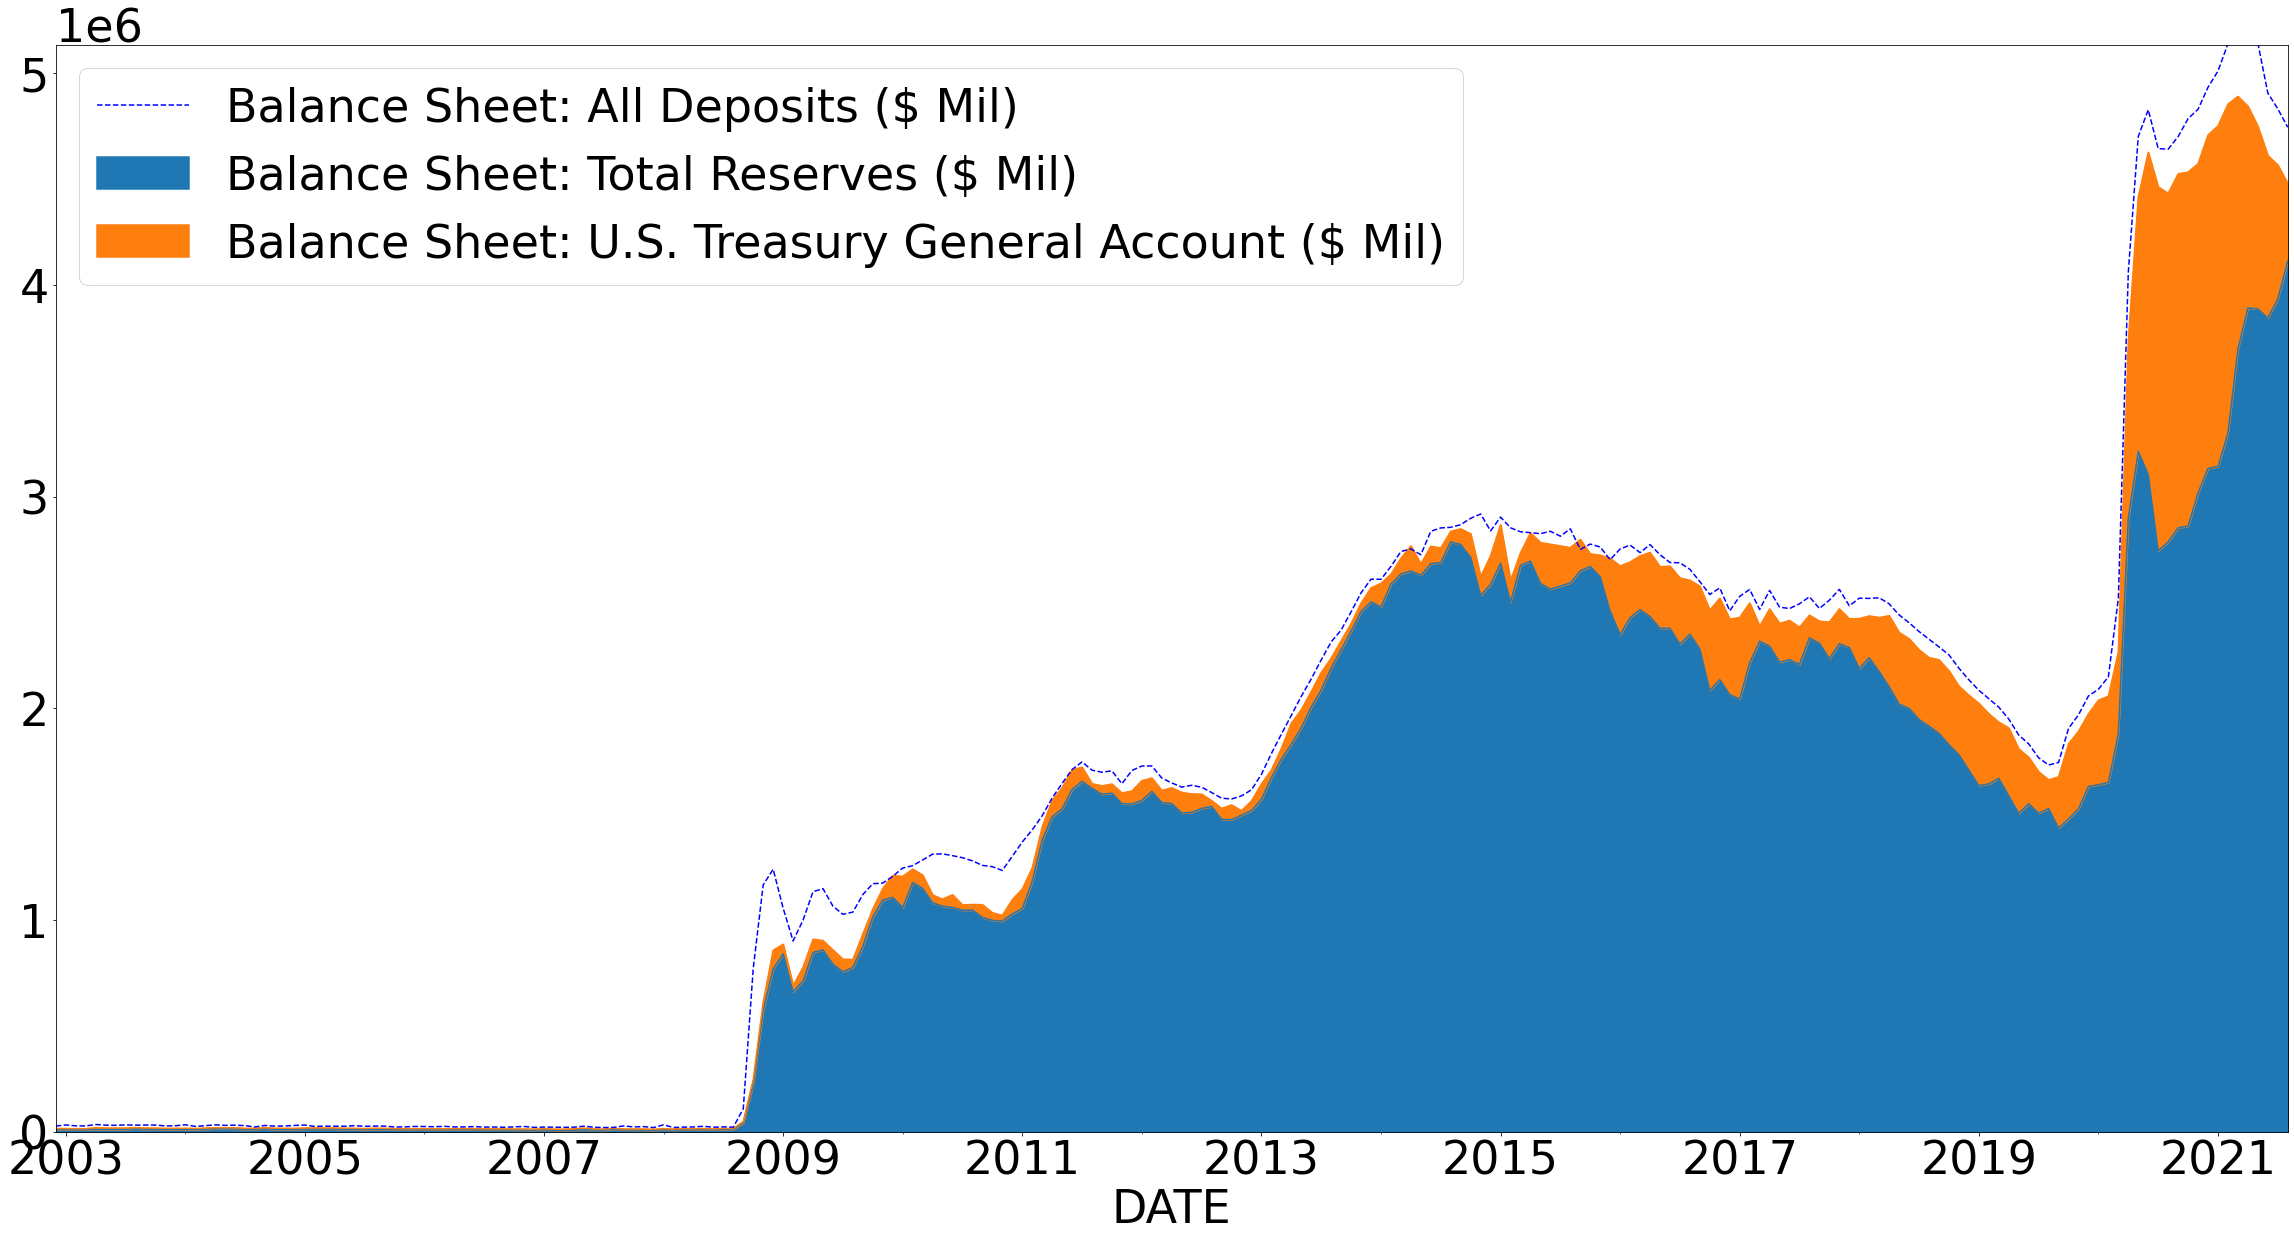

In [22]:
account_vars = ["Balance Sheet: Total Reserves ($ Mil)",
                "Balance Sheet: U.S. Treasury General Account ($ Mil)"]

plot_stacked_lines(data.loc["2002-12-31":], 
                   account_vars, 
                   linewidth = 1.5, 
                   total_var = "Balance Sheet: All Deposits ($ Mil)",
                  ncol = 1,
                  pp = pp)

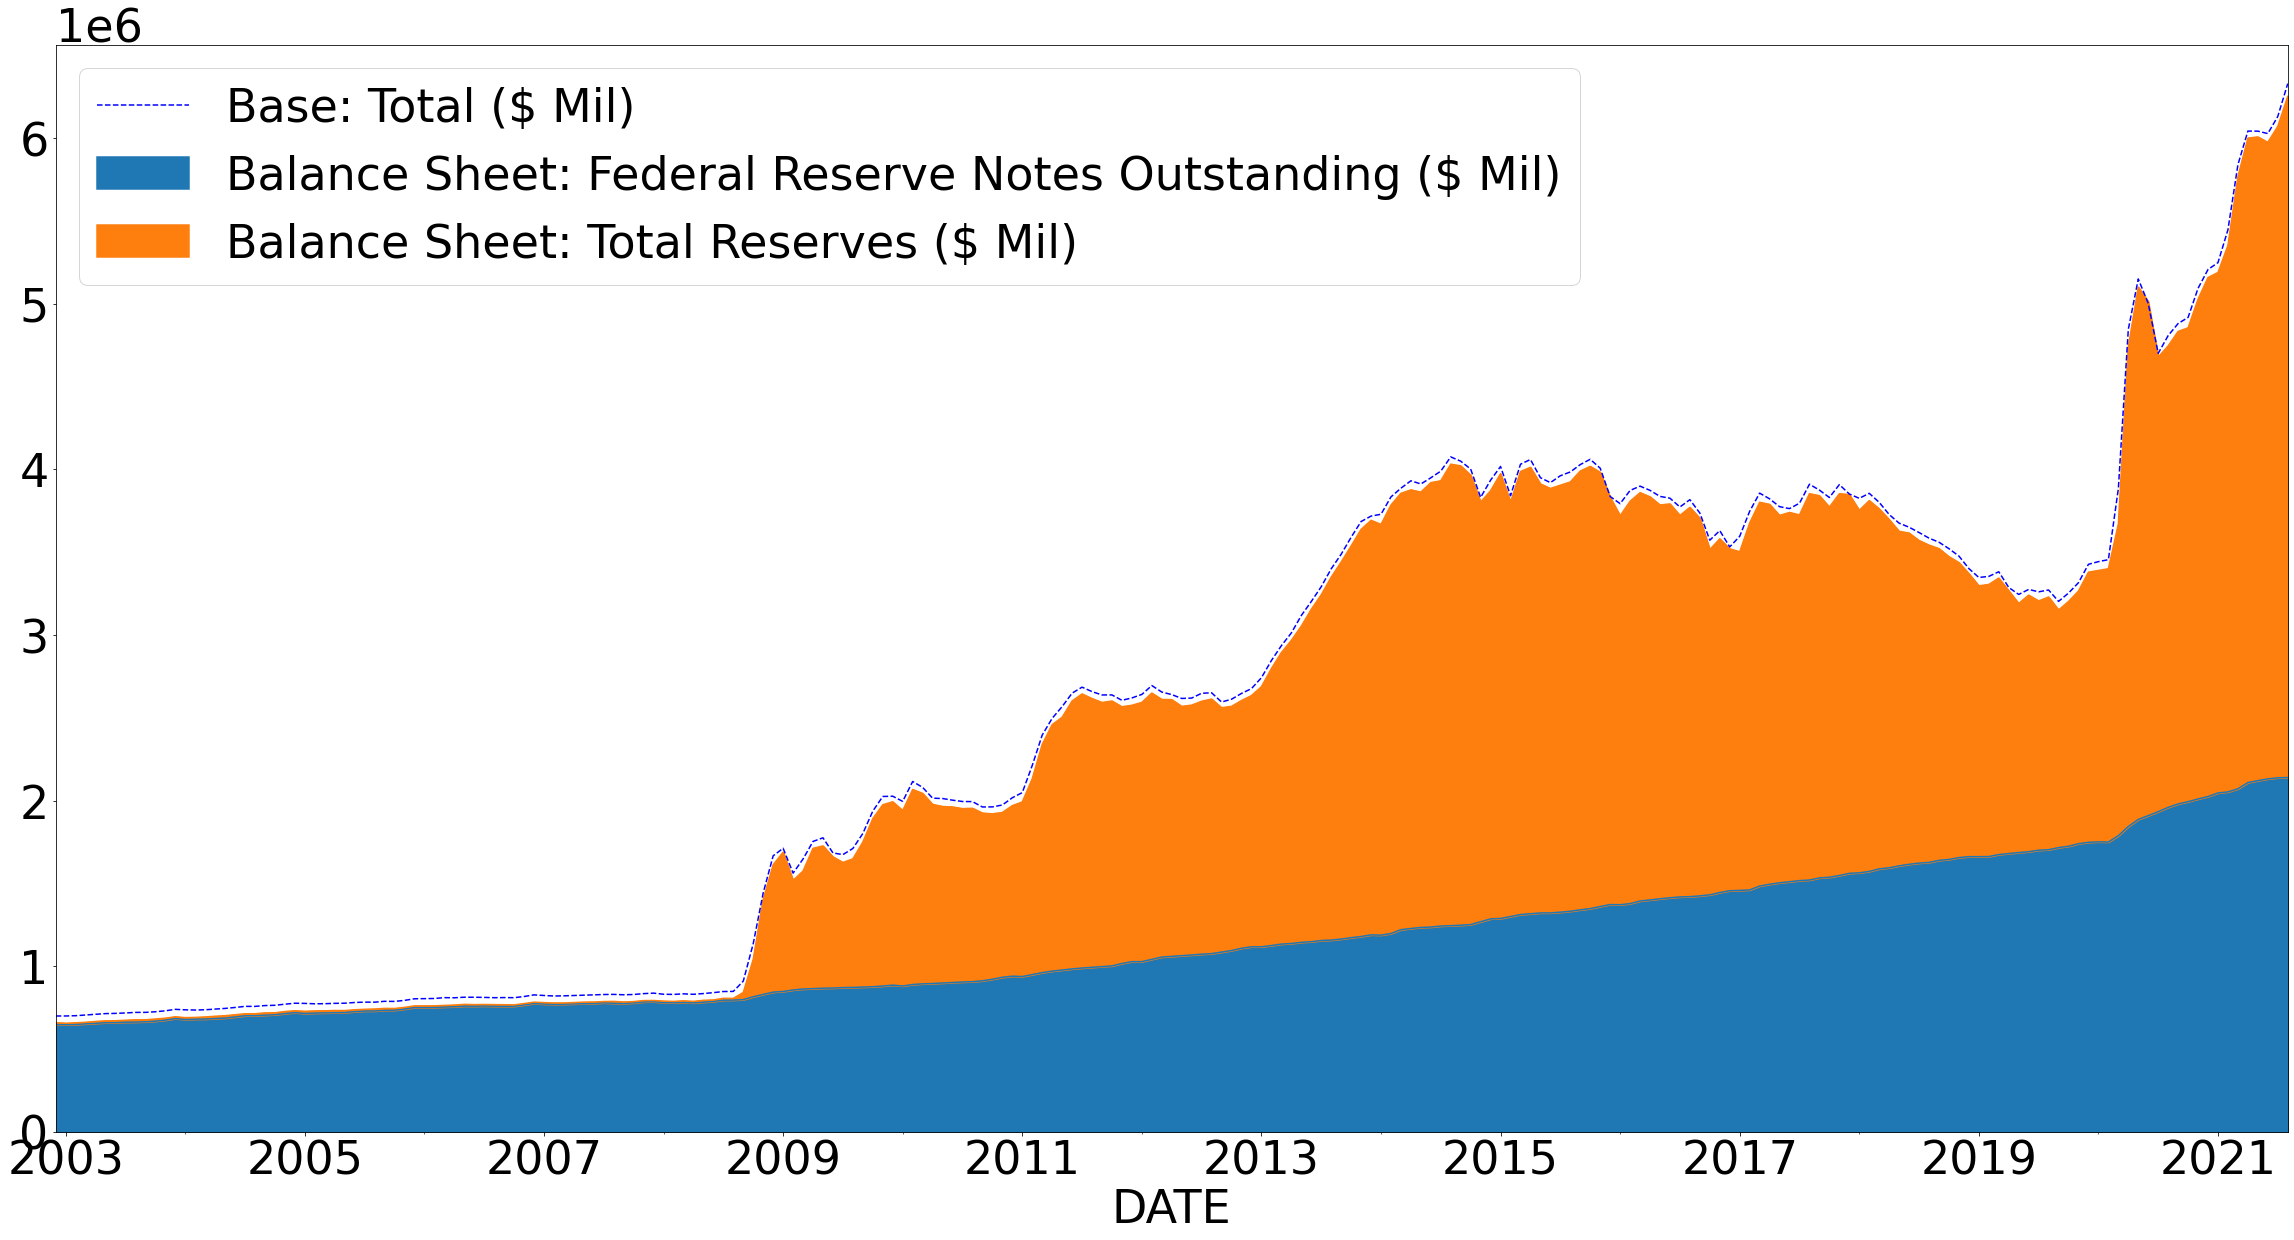

In [23]:
account_vars = ["Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)",
                "Balance Sheet: Total Reserves ($ Mil)"]

plot_stacked_lines(data.loc["2002-12-31":], 
                   account_vars, 
                   linewidth = 1.5, 
                   total_var = "Base: Total ($ Mil)",
                  ncol = 1,
                  pp = pp)

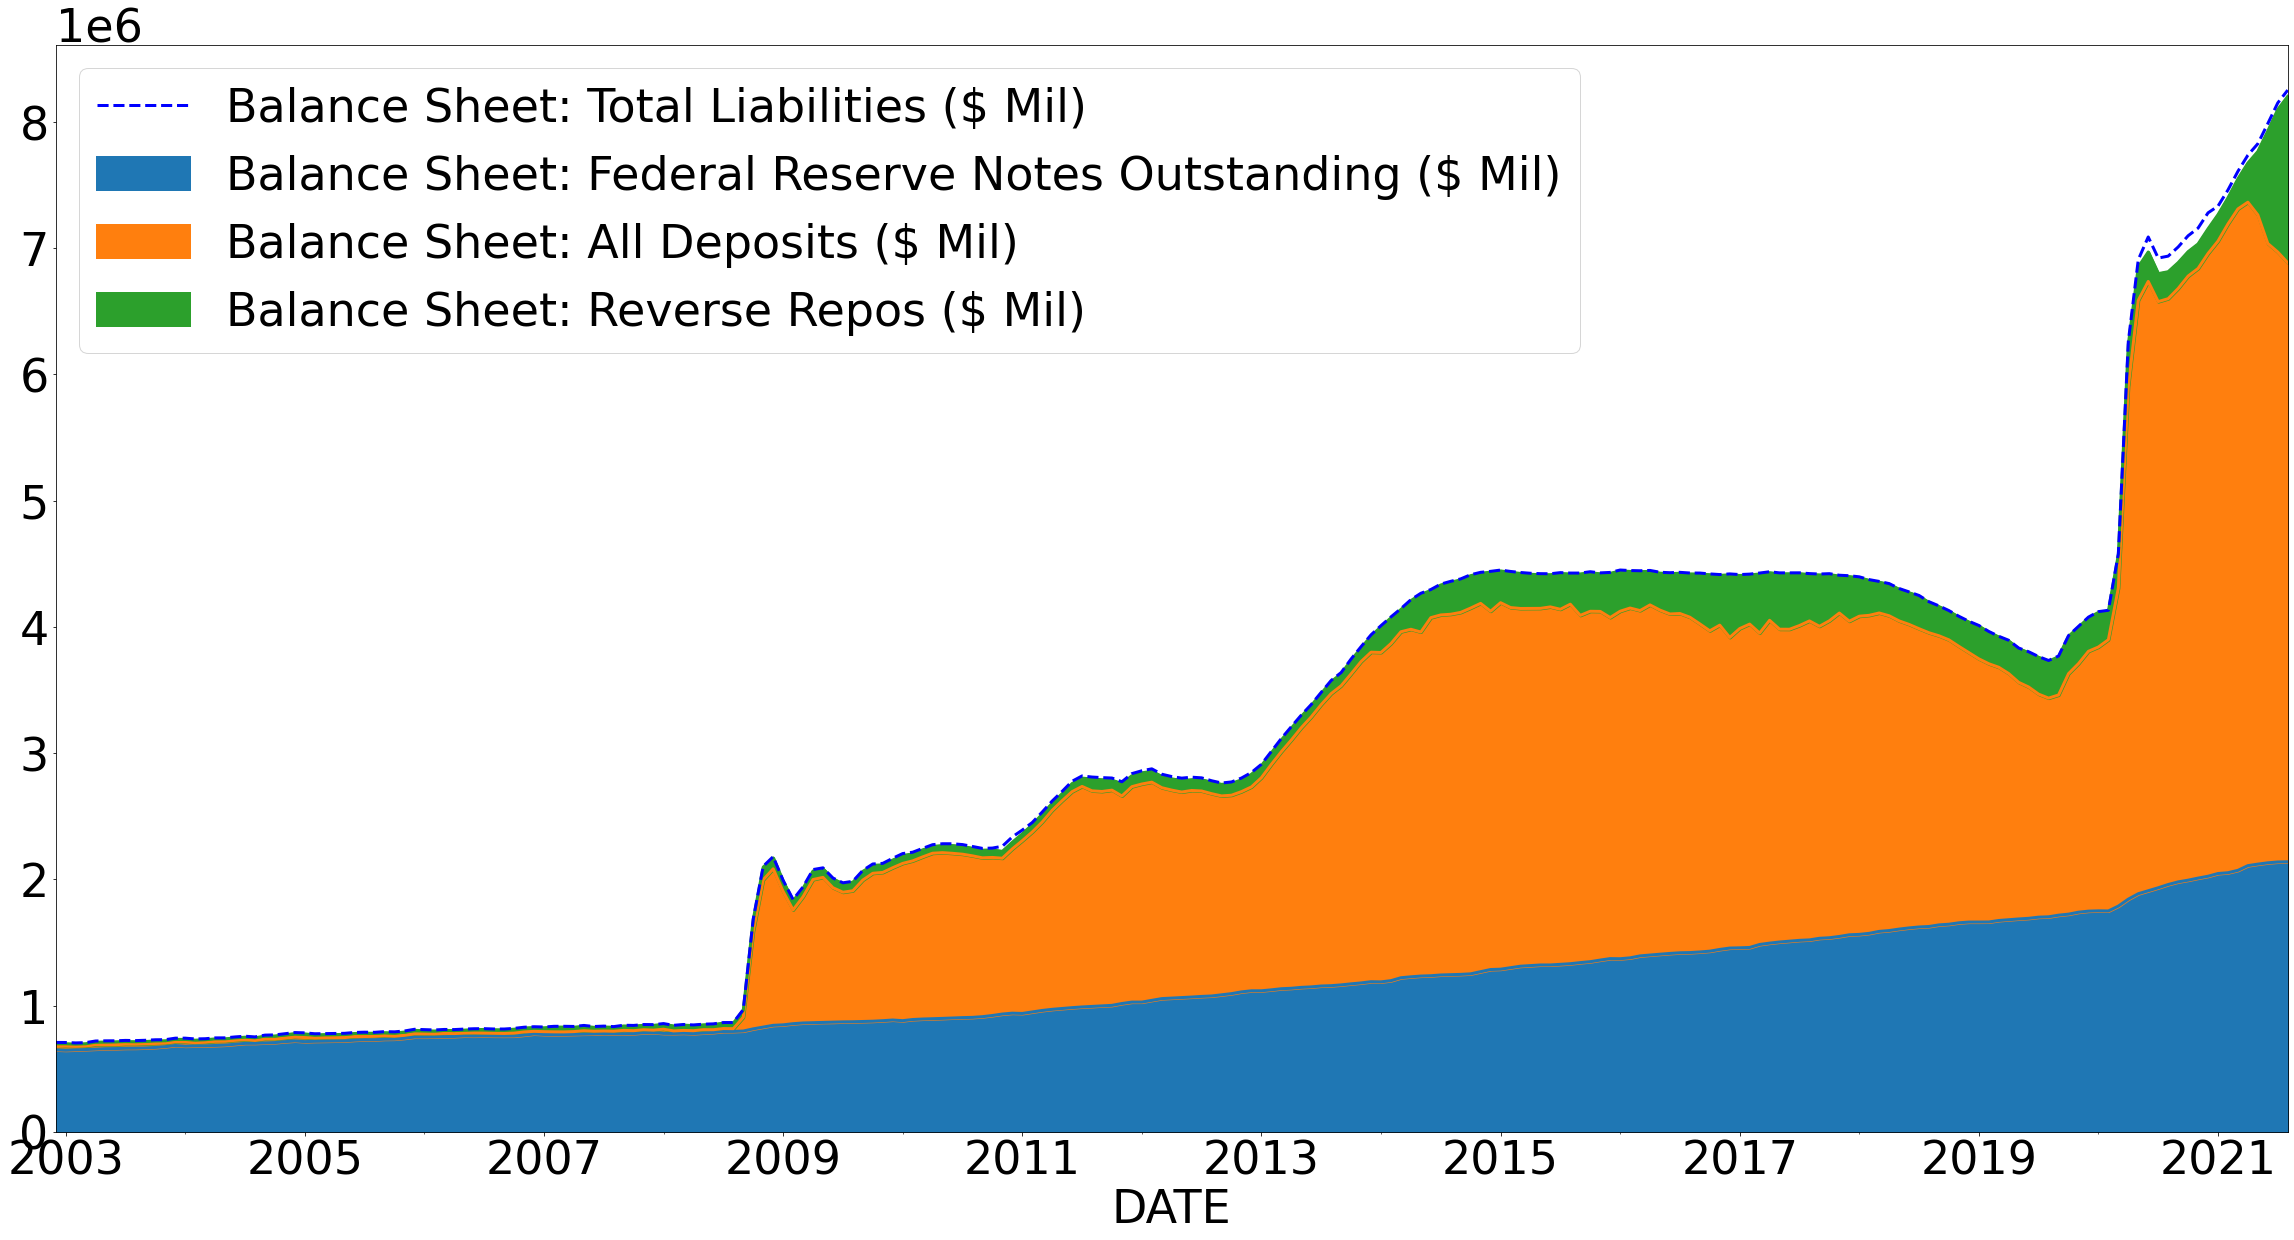

In [24]:
account_vars = ["Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)",
                "Balance Sheet: All Deposits ($ Mil)",
                "Balance Sheet: Reverse Repos ($ Mil)"]

plot_stacked_lines(data.loc["2002-12-31":], 
                   account_vars, 
                   linewidth = 3, 
                   total_var = "Balance Sheet: Total Liabilities ($ Mil)",
                  ncol = 1,
                  pp = pp)

## Overnight Lending and Fed Funds Rate

<ipython-input-7-05a2a0154c06>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x, 2) for x in vals])


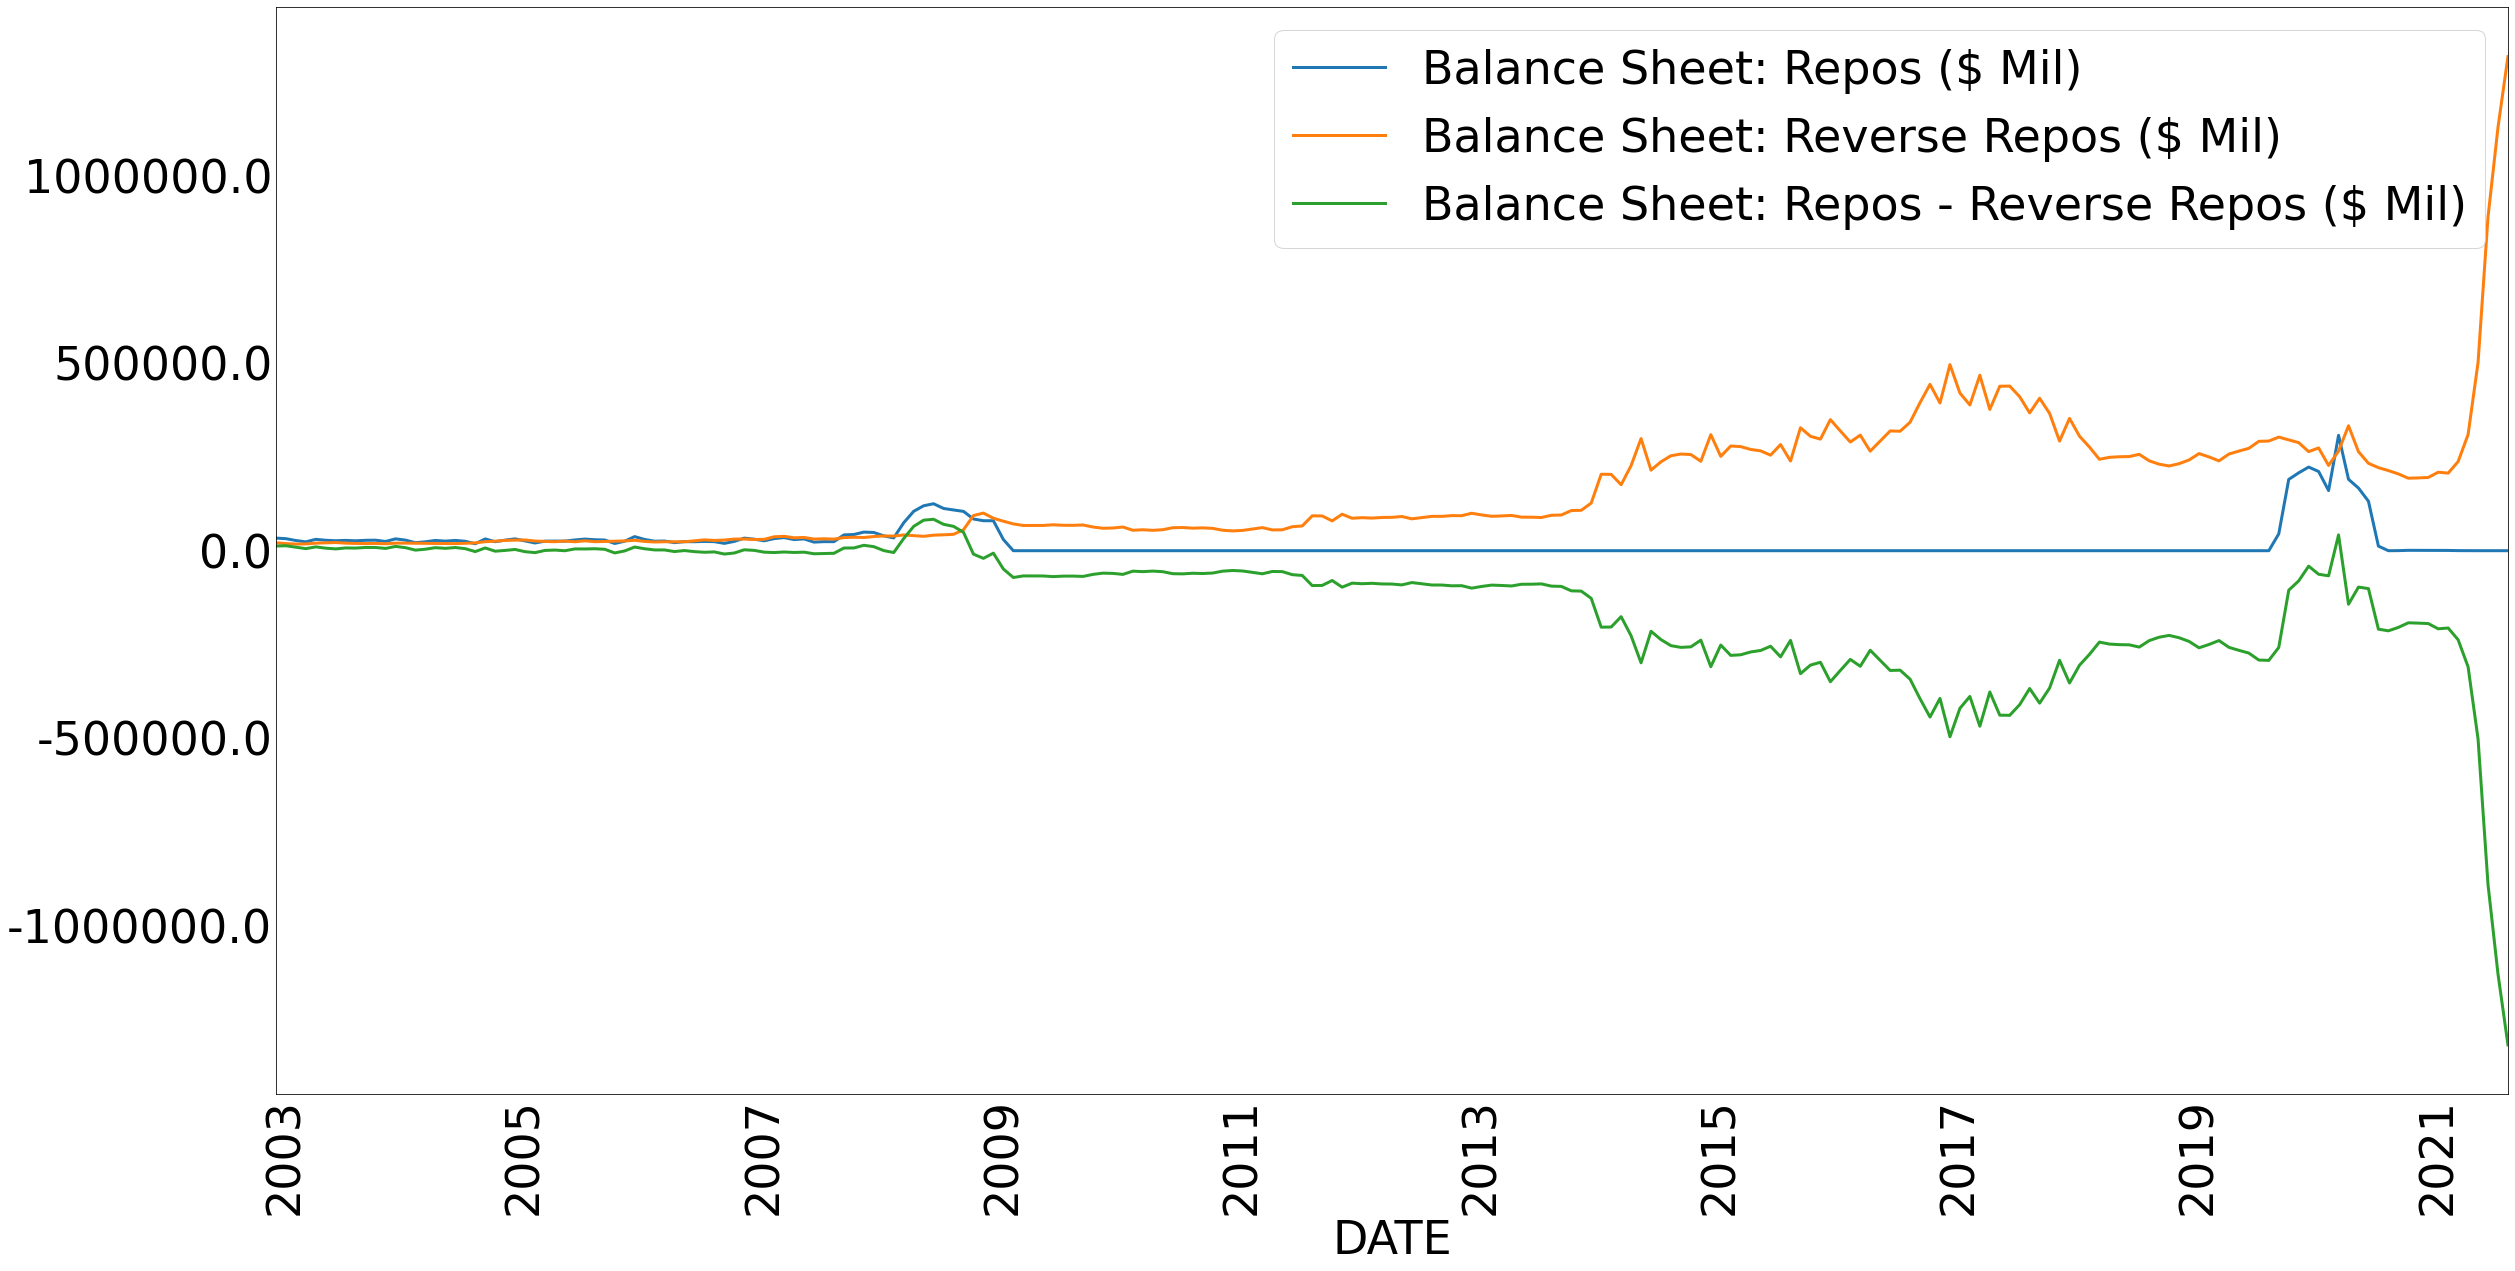

In [25]:
data["Balance Sheet: Repos - Reverse Repos ($ Mil)"] =\
    data["Balance Sheet: Repos ($ Mil)"].sub(data["Balance Sheet: Reverse Repos ($ Mil)"])

overnight_vars = ["Balance Sheet: Repos ($ Mil)",
                  "Balance Sheet: Reverse Repos ($ Mil)",
                  "Balance Sheet: Repos - Reverse Repos ($ Mil)"]

plot_lines(data[overnight_vars], 
           linewidth = 3)

## Interest Rates

<ipython-input-7-05a2a0154c06>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x, 2) for x in vals])


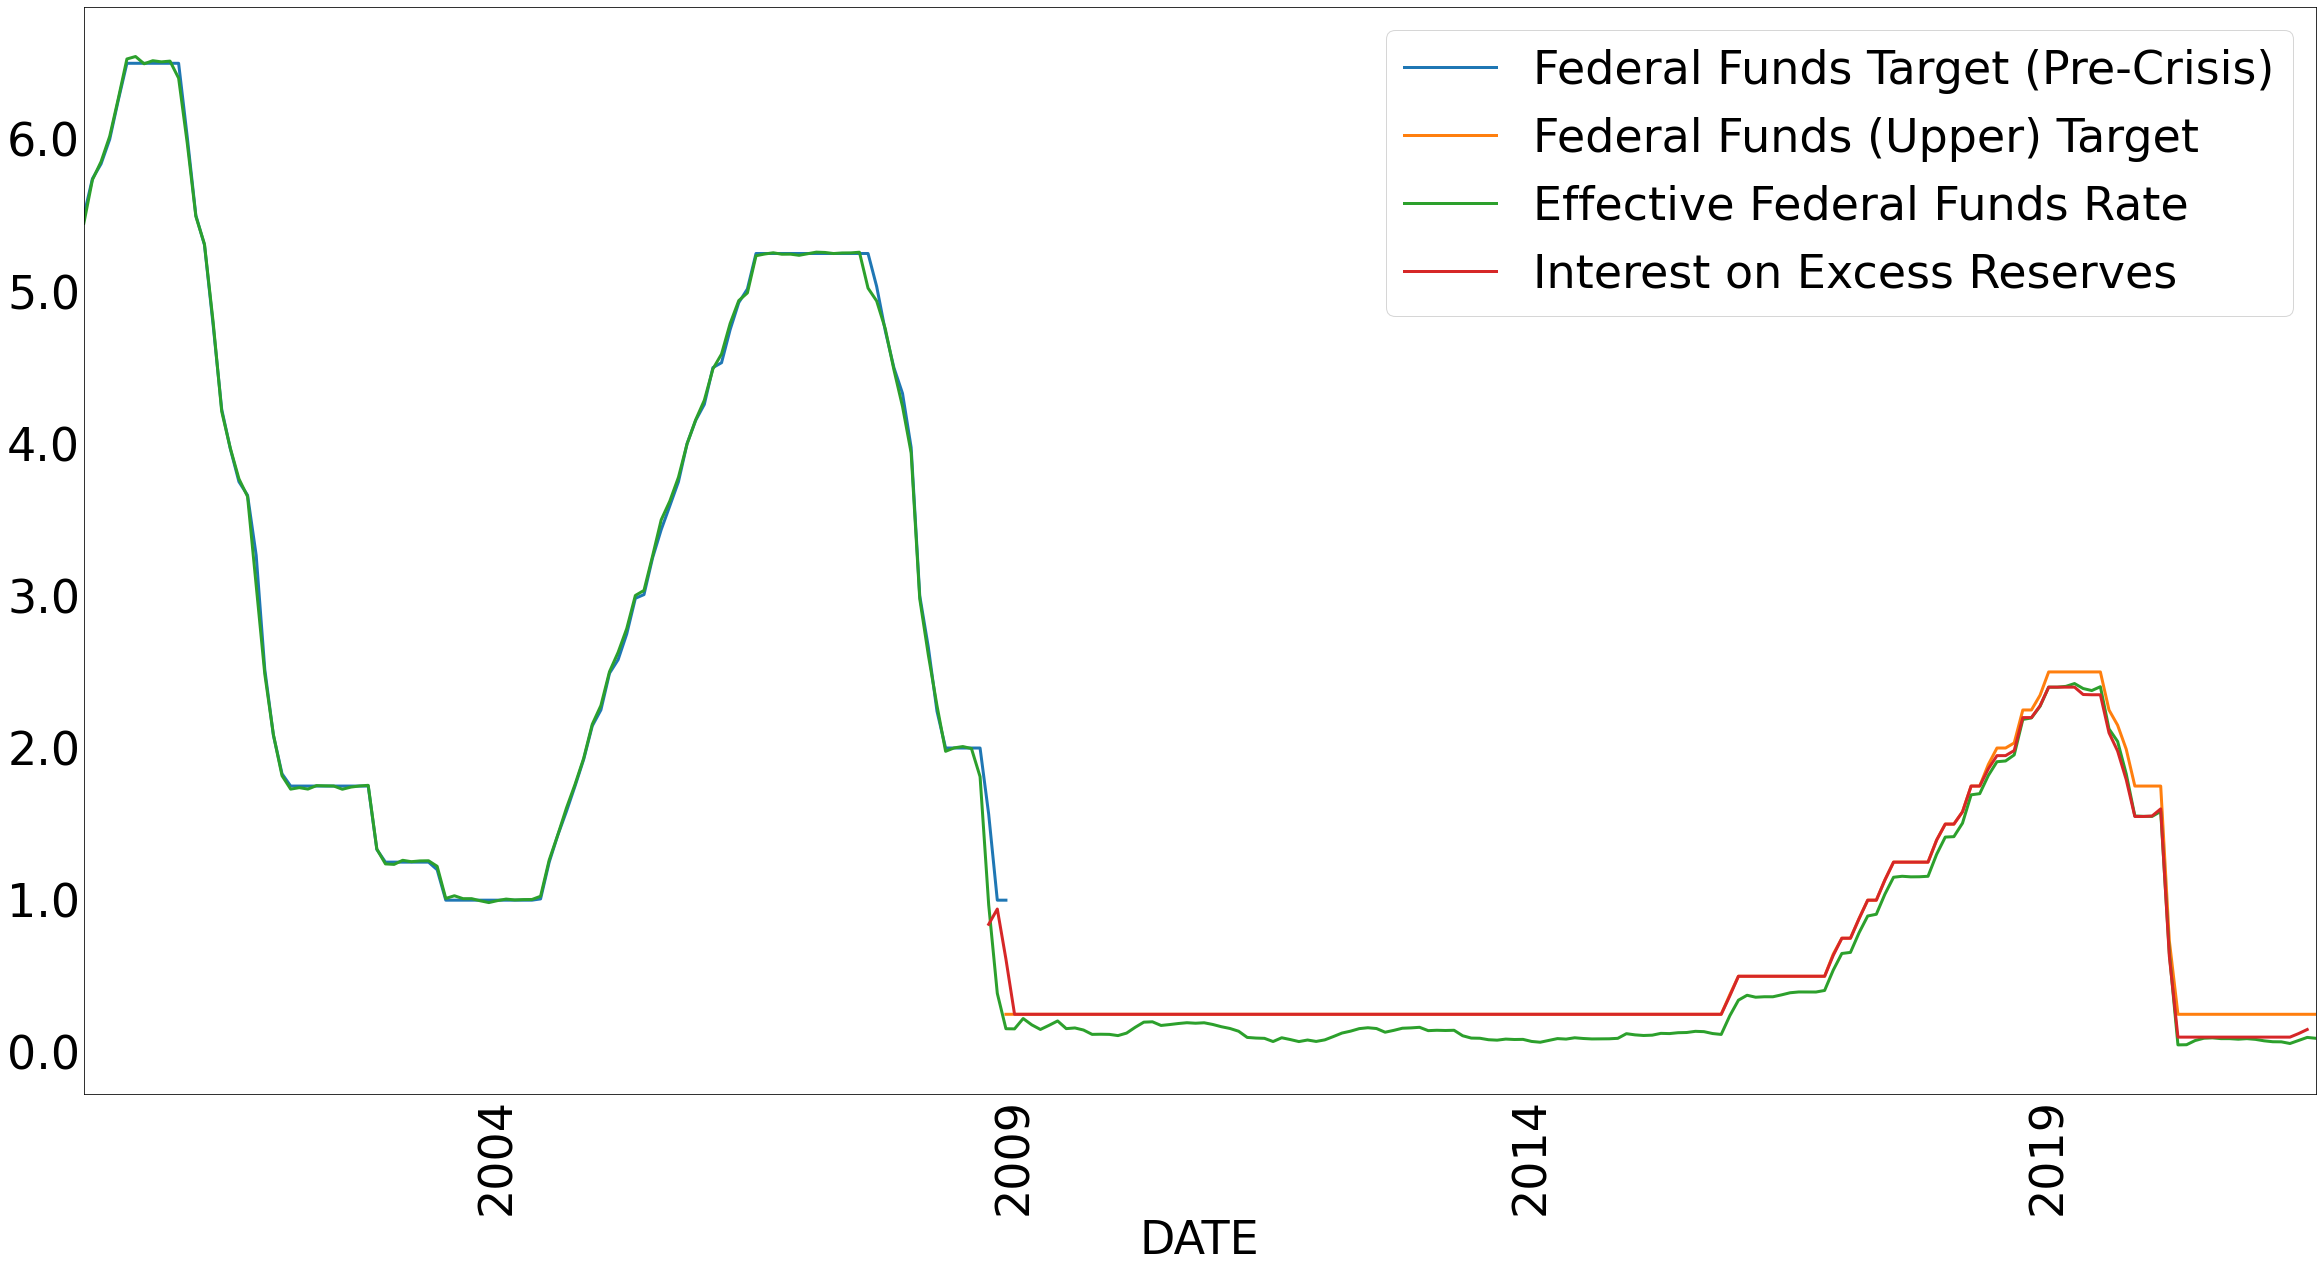

In [26]:
interest_vars = ["Federal Funds Target (Pre-Crisis)",
                  "Federal Funds (Upper) Target",
                  "Effective Federal Funds Rate",
                  "Interest on Excess Reserves"]
# interest_vars = columns. Can format it like this if you use .loc
plot_lines(data.loc["2000":, interest_vars], linewidth = 3)

In [27]:
pp.close()